# Instalaciones necesarias

In [1]:
!unzip -qq runs.zip

In [2]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 123.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.5 MB/s eta 0:00:00
   ━━

# Configuración de carpeta principal y carga de librerias

In [7]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [4]:
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image
from roboflow import Roboflow

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.2/112.6 GB disk)


# Descargar el dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
rf = Roboflow(api_key="n64ZUKEBuOi2aGDOYEjv")
project = rf.workspace("ashish-cuamw").project("test-y7rj3")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test-1 in yolov8:: 100%|██████████| 9341/9341 [00:01<00:00, 7329.74it/s]


# Entrenamiento con YOLOV8s

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data=datasets/test-1/data.yaml epochs=100 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 219MB/s]
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/test-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, per

In [ ]:
# Comprimir la carpeta
!zip -r runs_v12s.zip /content/datasets/runs

# Descargarla
from google.colab import files
files.download('runs_v12s.zip')

# Comprimimos y guardamos carpeta RUNS

In [ ]:
# Comprimir la carpeta
!zip -r runs.zip /content/runs

# Descargarla
from google.colab import files
files.download('runs.zip')

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 33%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 9%)
  adding: content/runs/detect/train/val_batch2_pred.jpg (deflated 9%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 5%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 10%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 25%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 17%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 8%)
  adding: content/runs/detect/train/R_curve.png (deflated 10%)
  adding: content/runs/detect/train/labels.jpg (deflated 24%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 6%)
  adding: content/runs/detect/train/results.png (deflated 8%)
  adding: content/runs/detect/train/weigh

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Cargamos Modelos

In [8]:
# Instala YOLOv5 desde el repo oficial
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17491 (from 3)
Receiving objects: 100% (17511/17511), 16.65 MiB | 10.36 MiB/s, done.
Resolving deltas: 100% (11996/11996), done.
/content/yolov5


Cargamos todos los modelos

In [9]:
import torch

# Cargar modelo YOLOv5 con torch.hub
model_yolov5s = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/runs_v5s/train/detect-armas2/weights/best.pt')
model_yolov8s =  YOLO('/content/runs_v8s/detect/train/weights/best.pt')
model_yolov12s = YOLO('/content/runs_v12s/detect/train/weights/best.pt')

You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-7-7 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


# Validamos resultados con imagenes nuevas

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
image 1/1: 413x600 1 grenade
Speed: 170.5ms pre-process, 67.5ms inference, 431.9ms NMS per image at shape (1, 3, 448, 640)


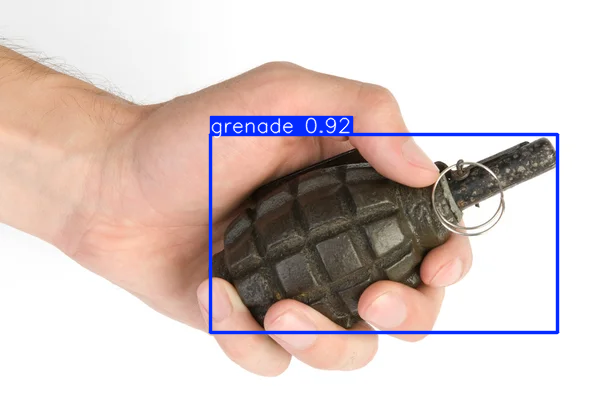

Saved 1 image to runs/detect/exp


In [12]:
results = model_yolov5s('/content/imagen1.jpg')  # Pasa directamente la imagen

# Mostrar resultados
results.print()              # Mostrar por consola
results.show()               # Mostrar con OpenCV (en Colab no lo verás sin imshow)
results.save()               # Guardar la imagen con resultados en 'runs/detect/exp'

In [14]:
results = model_yolov8s.predict(source='/content/imagen1.jpg', save=True, conf=0.5)


image 1/1 /content/imagen1.jpg: 576x800 1 grenade, 40.9ms
Speed: 6.0ms preprocess, 40.9ms inference, 2.2ms postprocess per image at shape (1, 3, 576, 800)
Results saved to runs/detect/predict


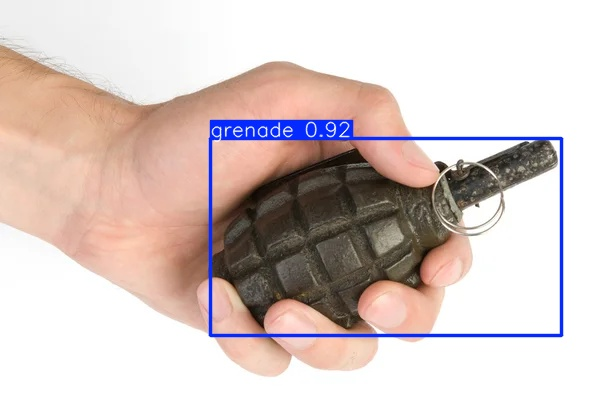

In [17]:
# Ruta de la imagen resultante
display(Image(filename='runs/detect/predict/imagen1.jpg'))

In [16]:
results = model_yolov12s.predict(source='/content/imagen1.jpg', save=True, conf=0.5)


image 1/1 /content/imagen1.jpg: 448x640 1 grenade, 44.6ms
Speed: 2.1ms preprocess, 44.6ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2


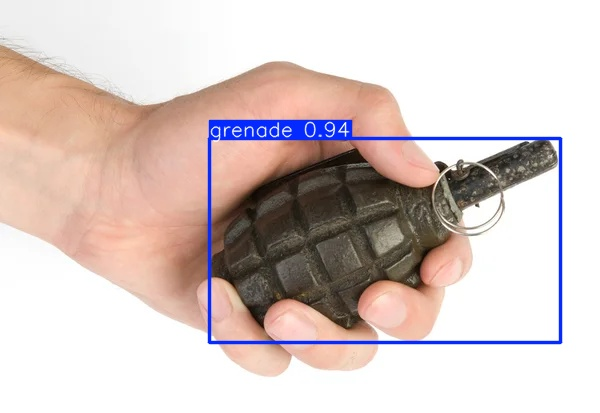

In [18]:
# Ruta de la imagen resultante
display(Image(filename='runs/detect/predict2/imagen1.jpg'))

# Comparamos entre Yolov5/Yolov8/Yolov12

Graficos obtenidos de los entrenamientos



*   YOLOV5S



Mostrando: results.png


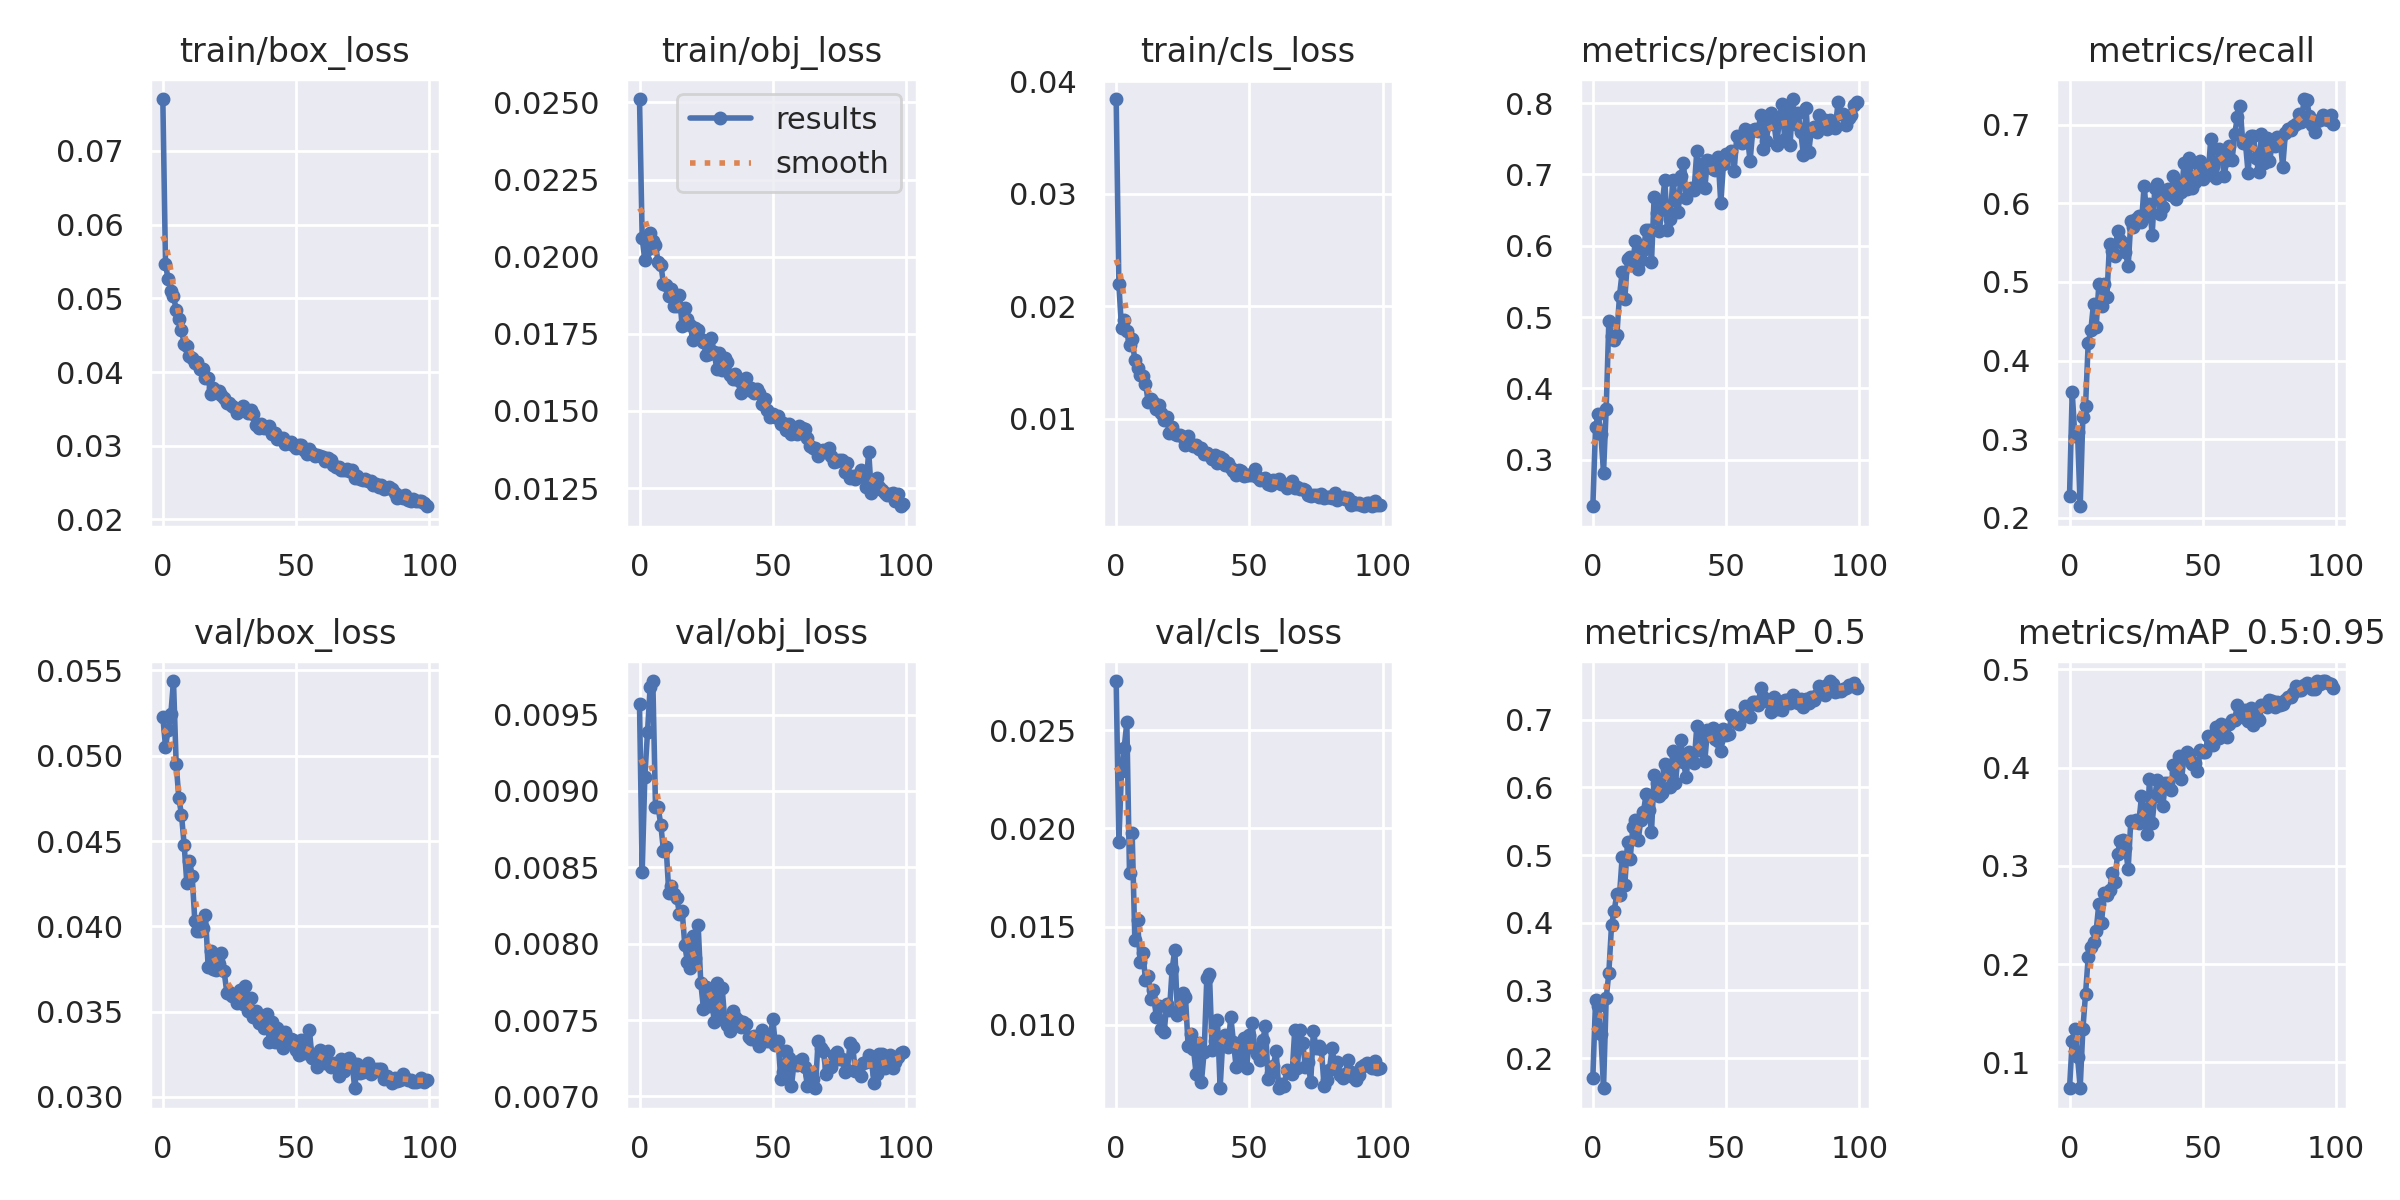

Mostrando: PR_curve.png


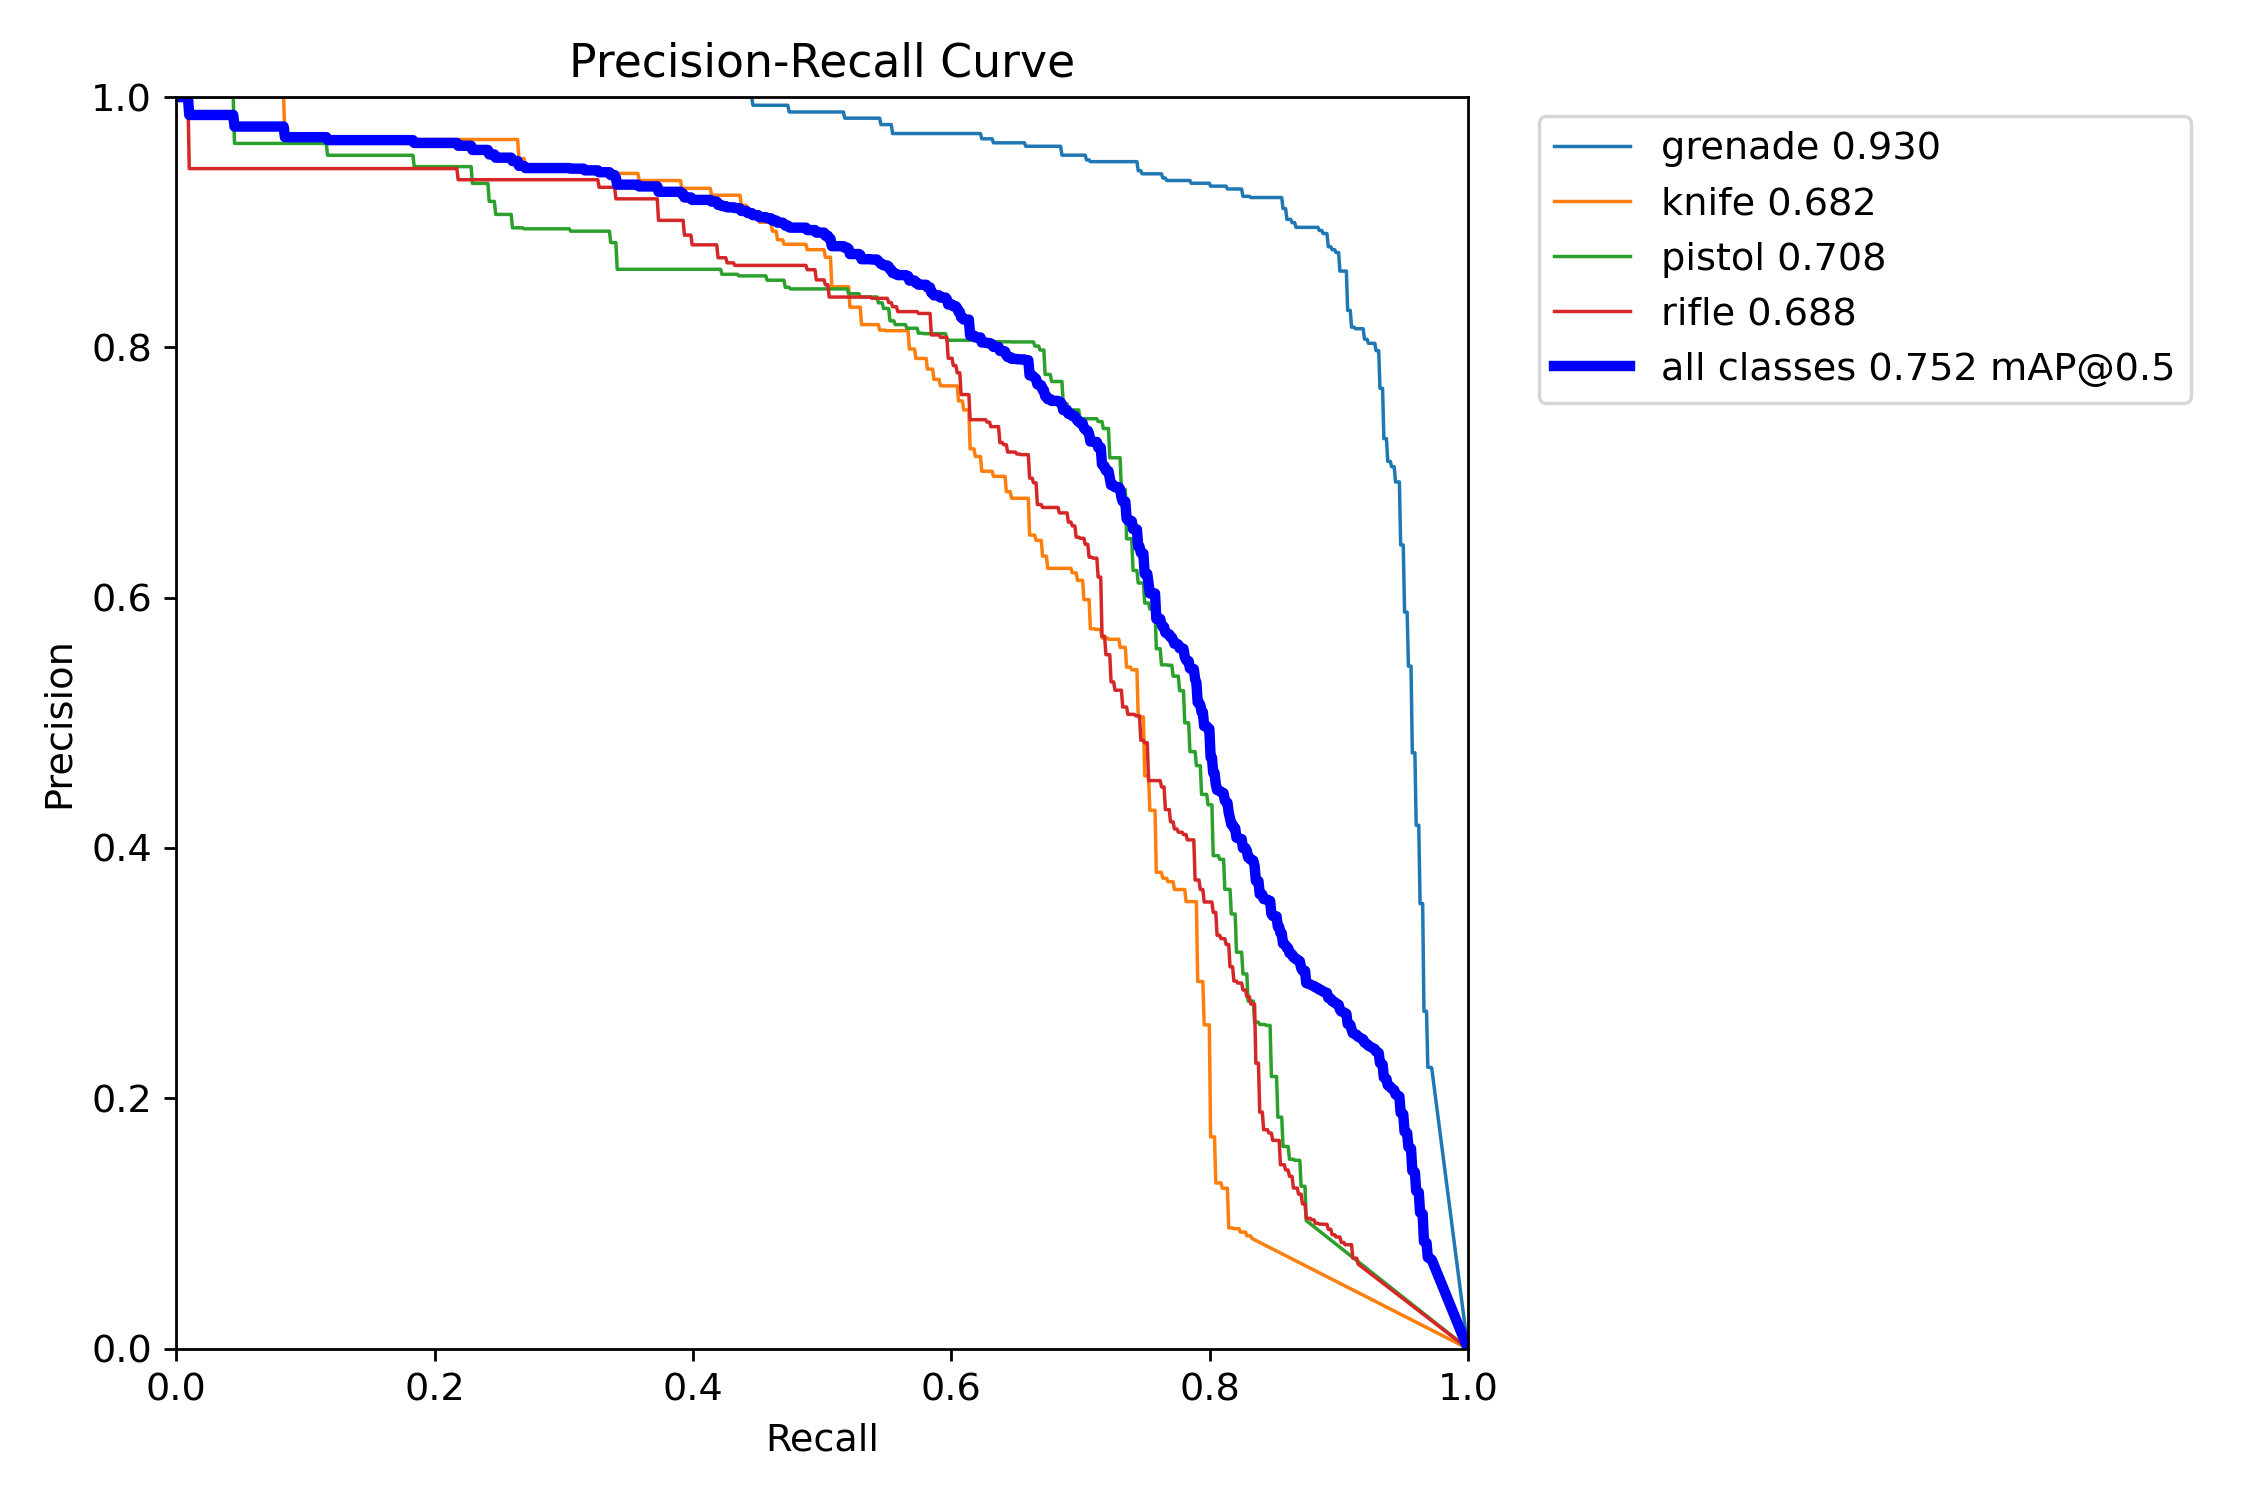

Mostrando: confusion_matrix.png


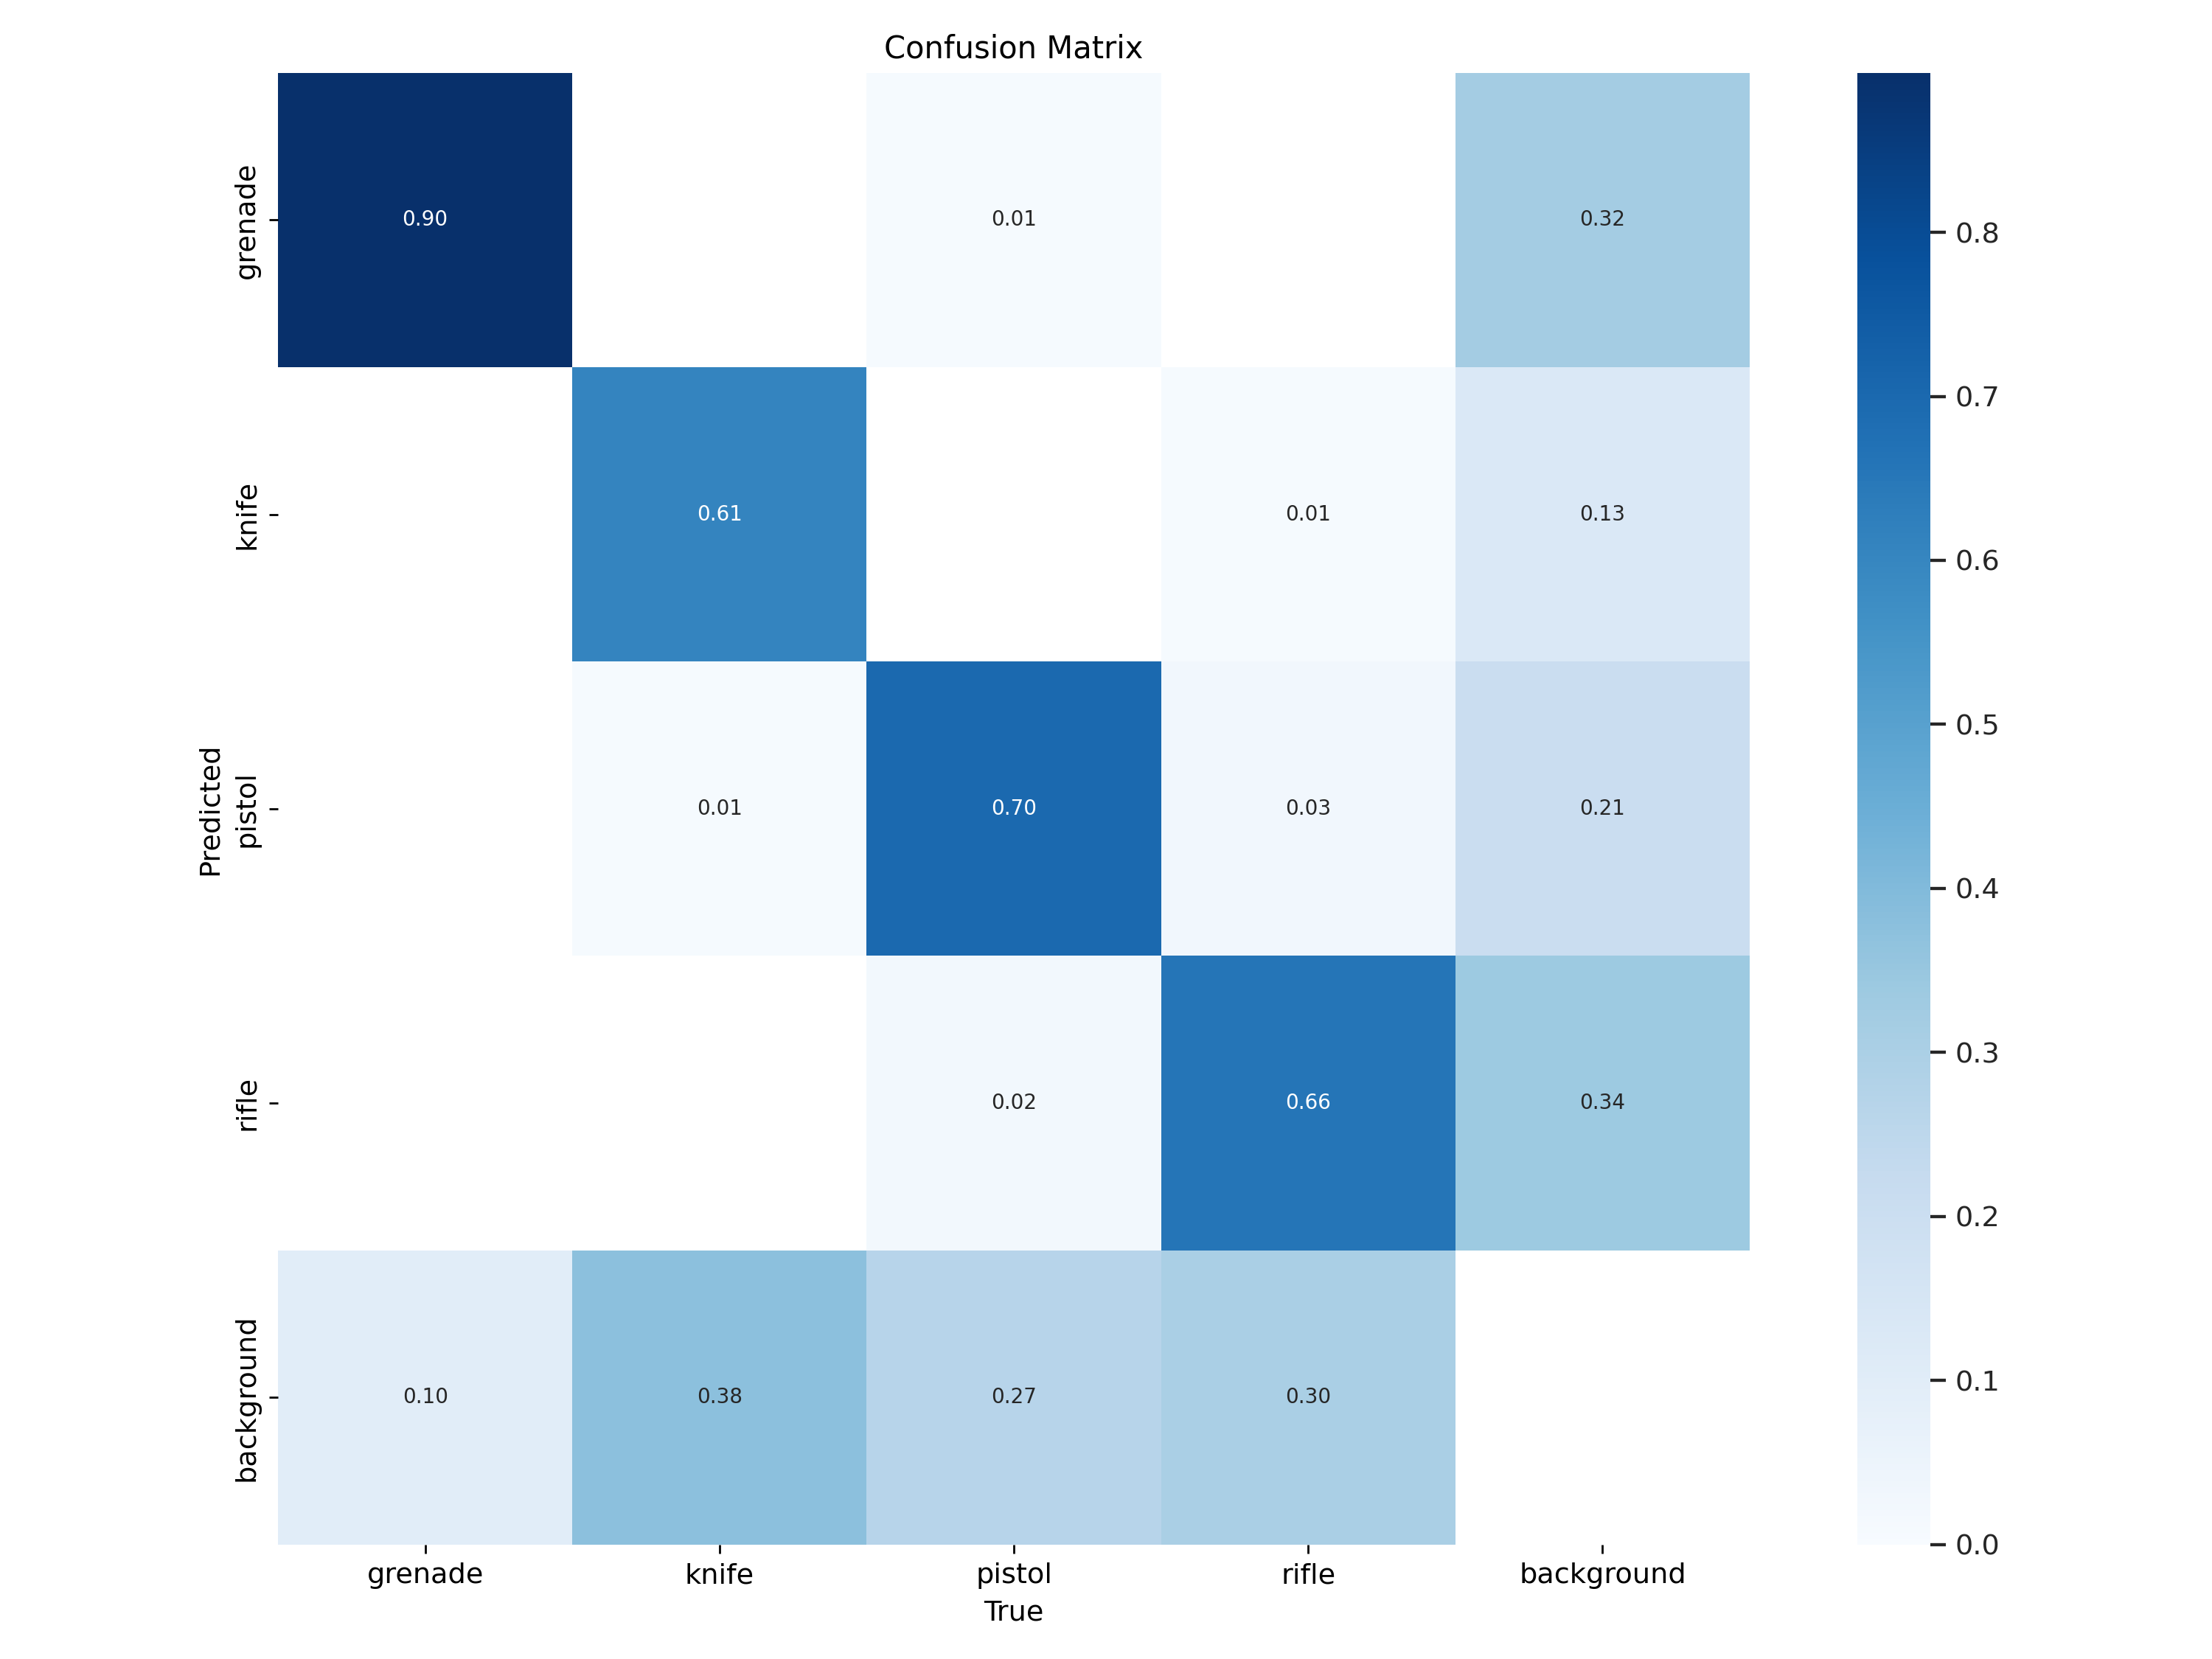

Mostrando: F1_curve.png


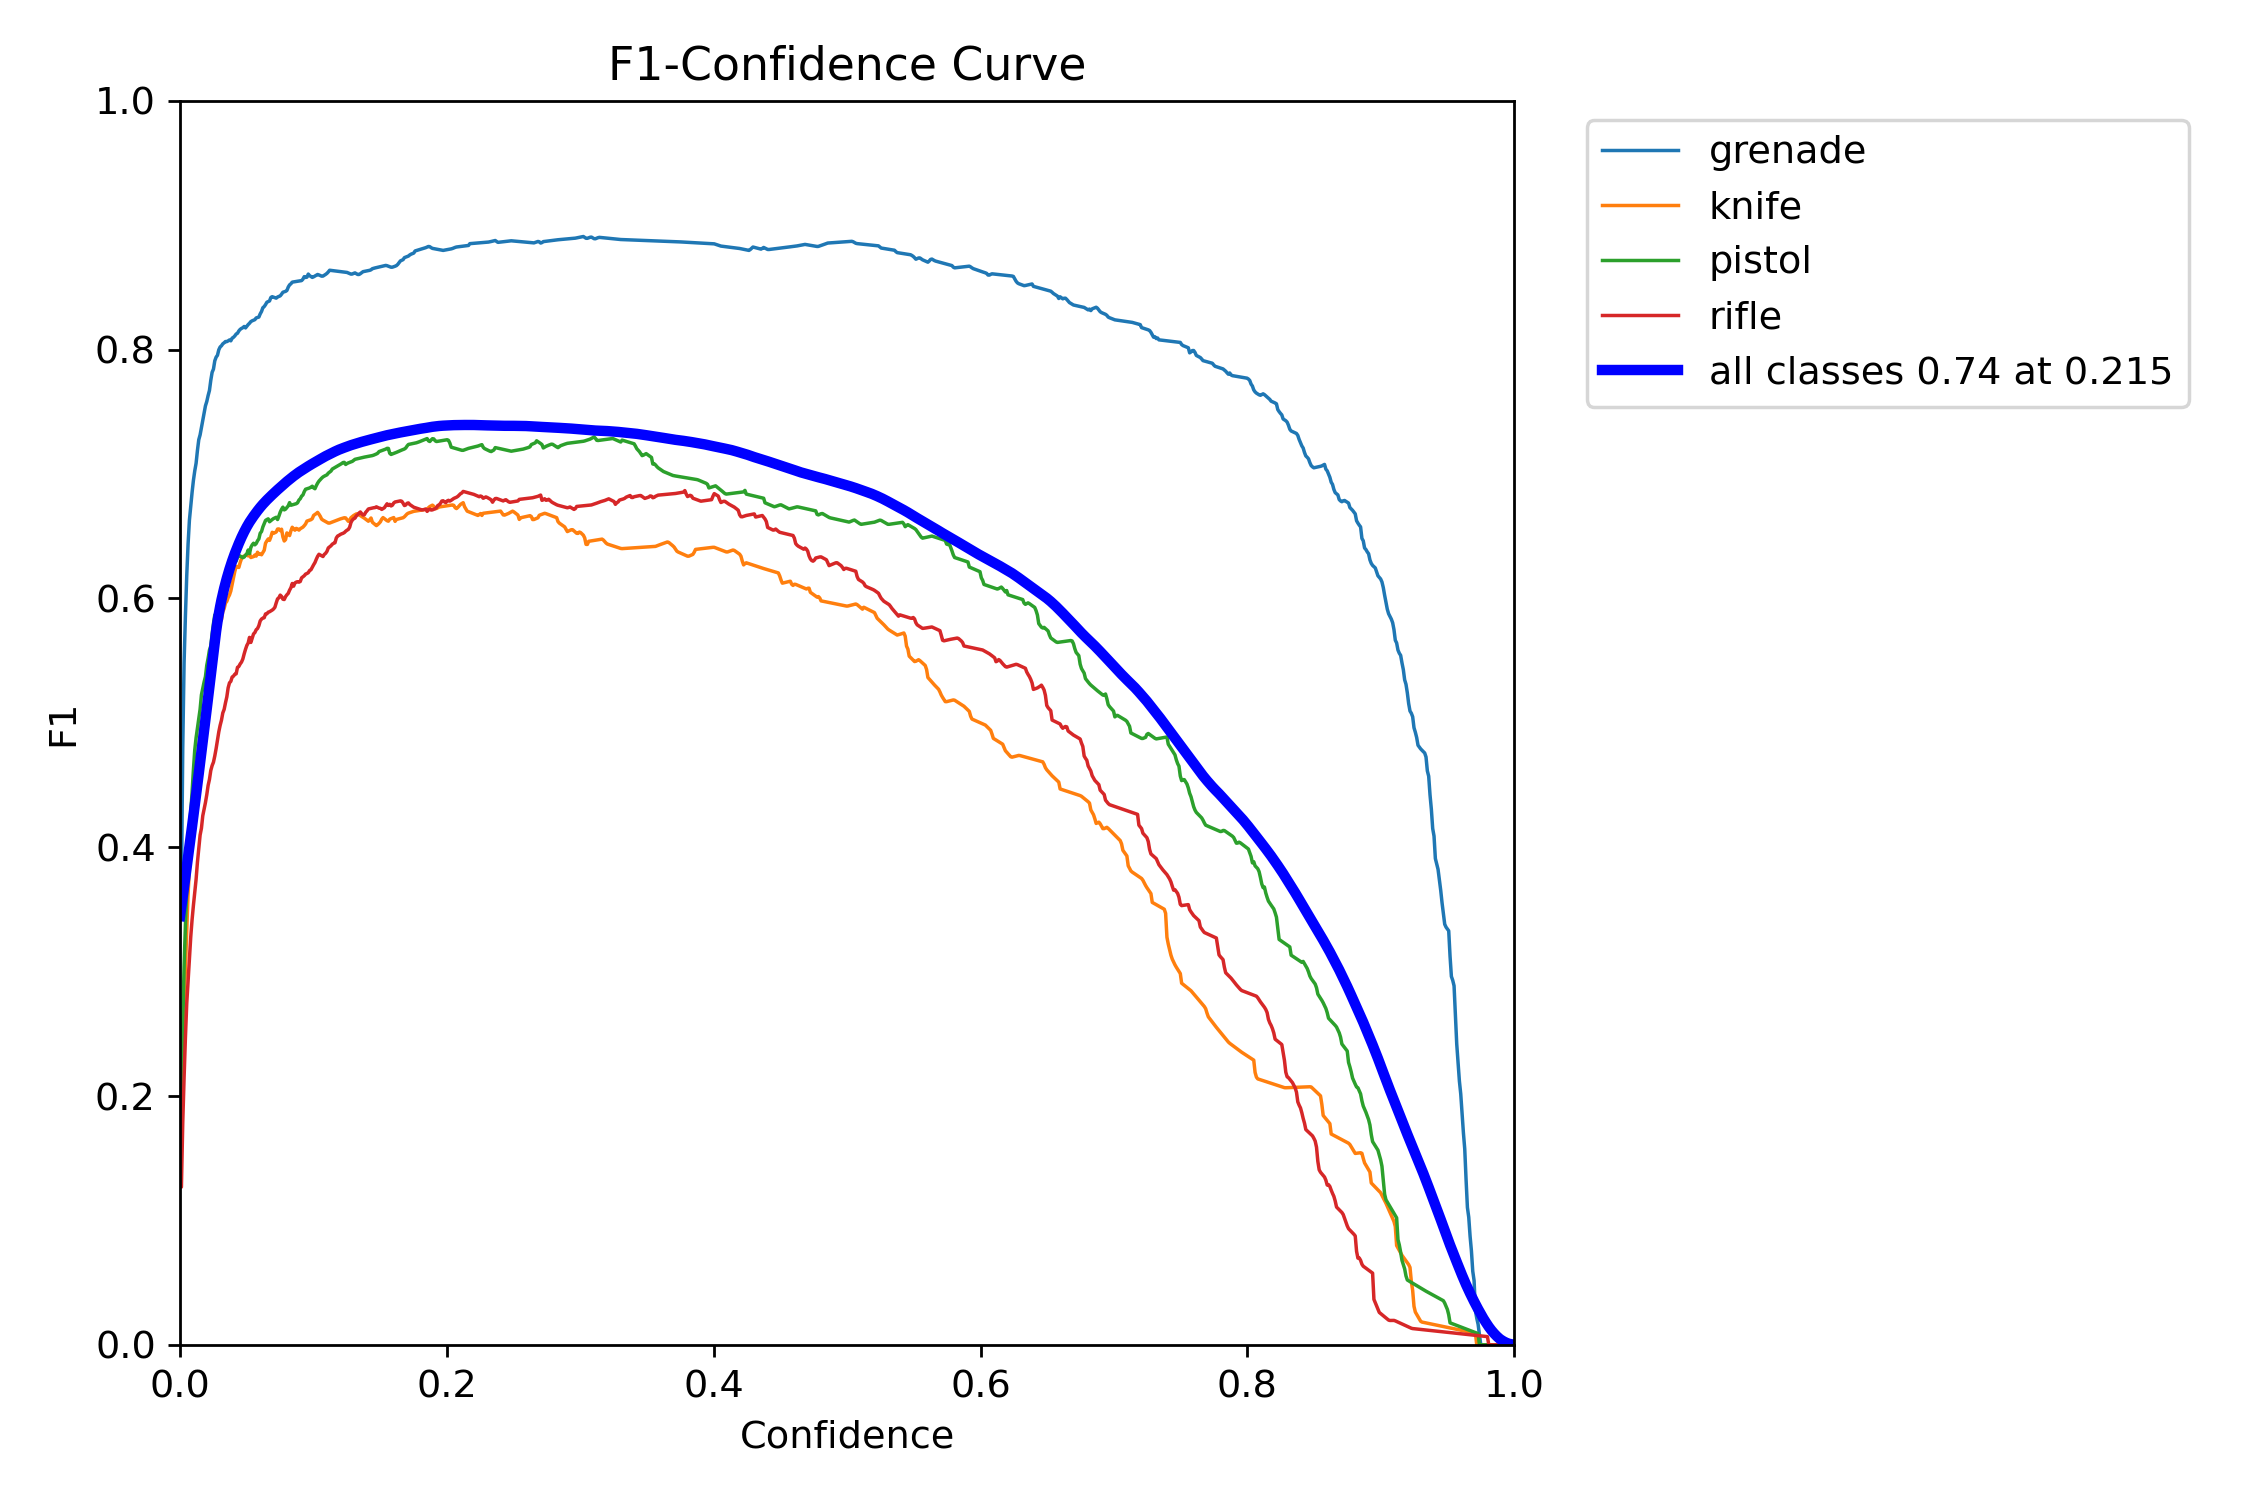

Mostrando: val_batch0_pred.jpg


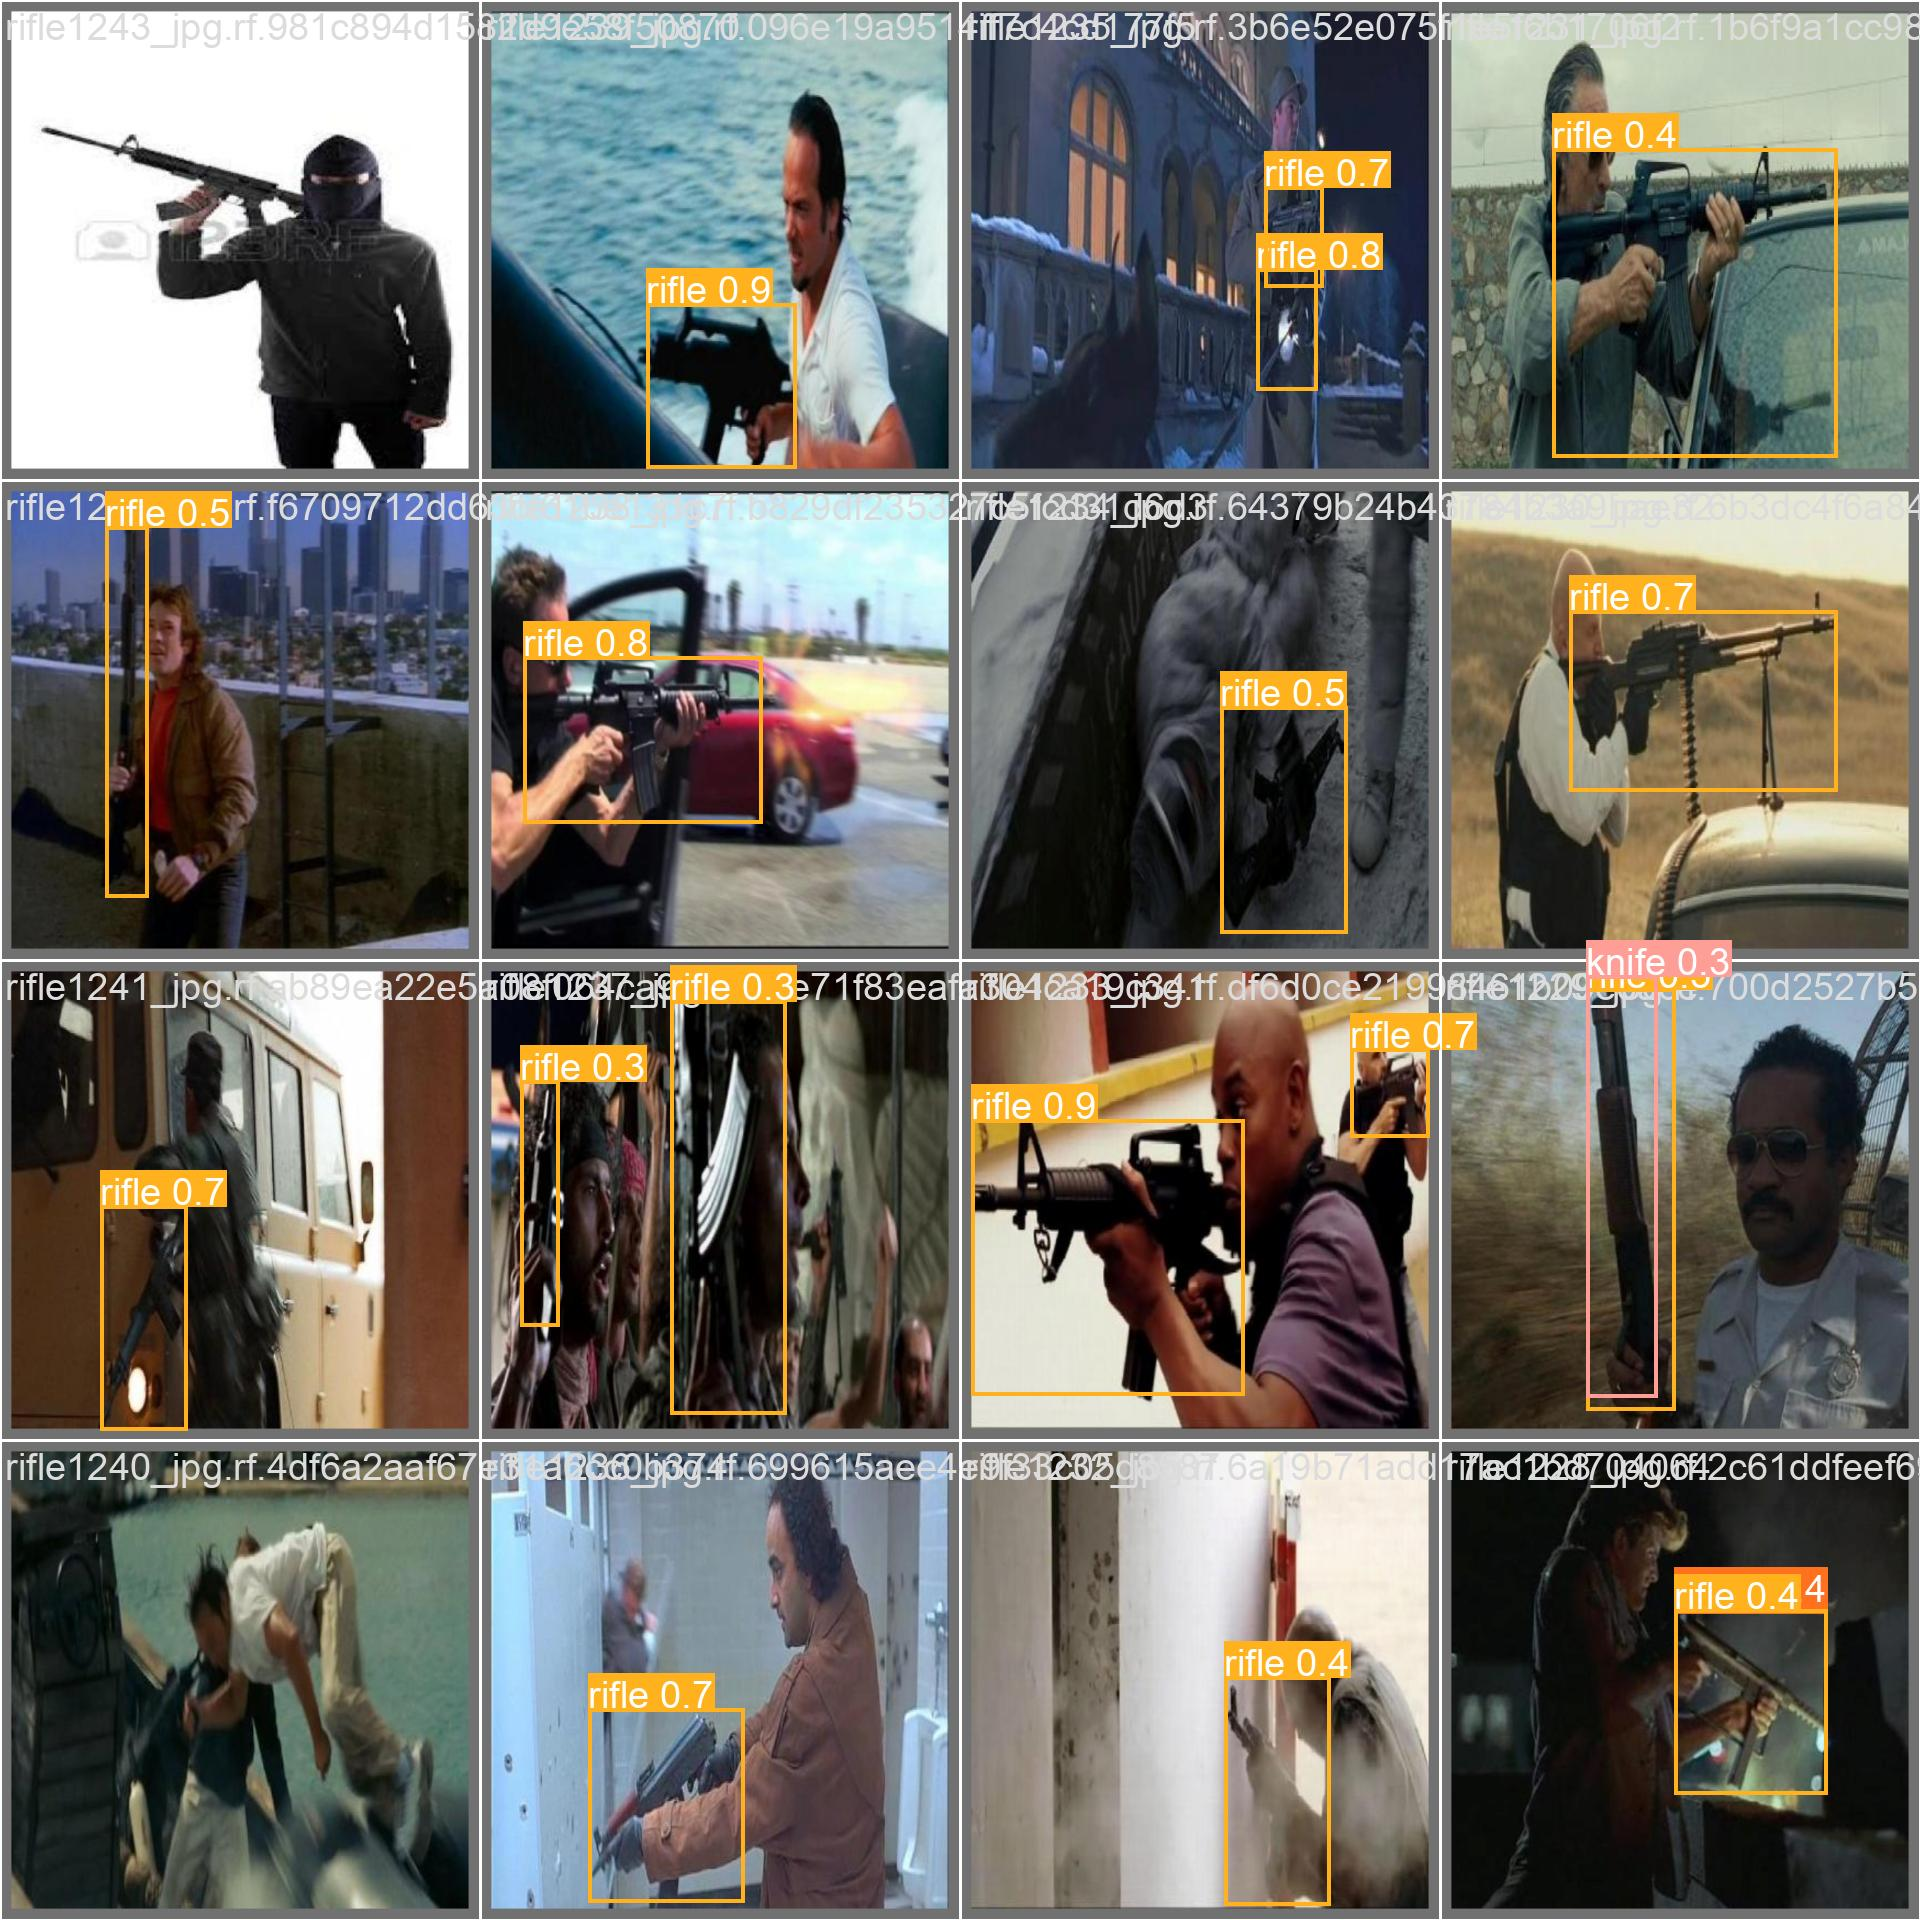

In [25]:
exp_path = '/content/runs_v5s/train/detect-armas2'
import os

images_to_show = [
    'results.png',
    'PR_curve.png',
    'confusion_matrix.png',
    'F1_curve.png',
    'val_batch0_pred.jpg'
]

for img_name in images_to_show:
    img_path = os.path.join(exp_path, img_name)
    if os.path.exists(img_path):
        print(f"Mostrando: {img_name}")
        display(Image(filename=img_path))
    else:
        print(f"❌ No encontrado: {img_name}")



*   YOLOV8S

Mostrando: results.png


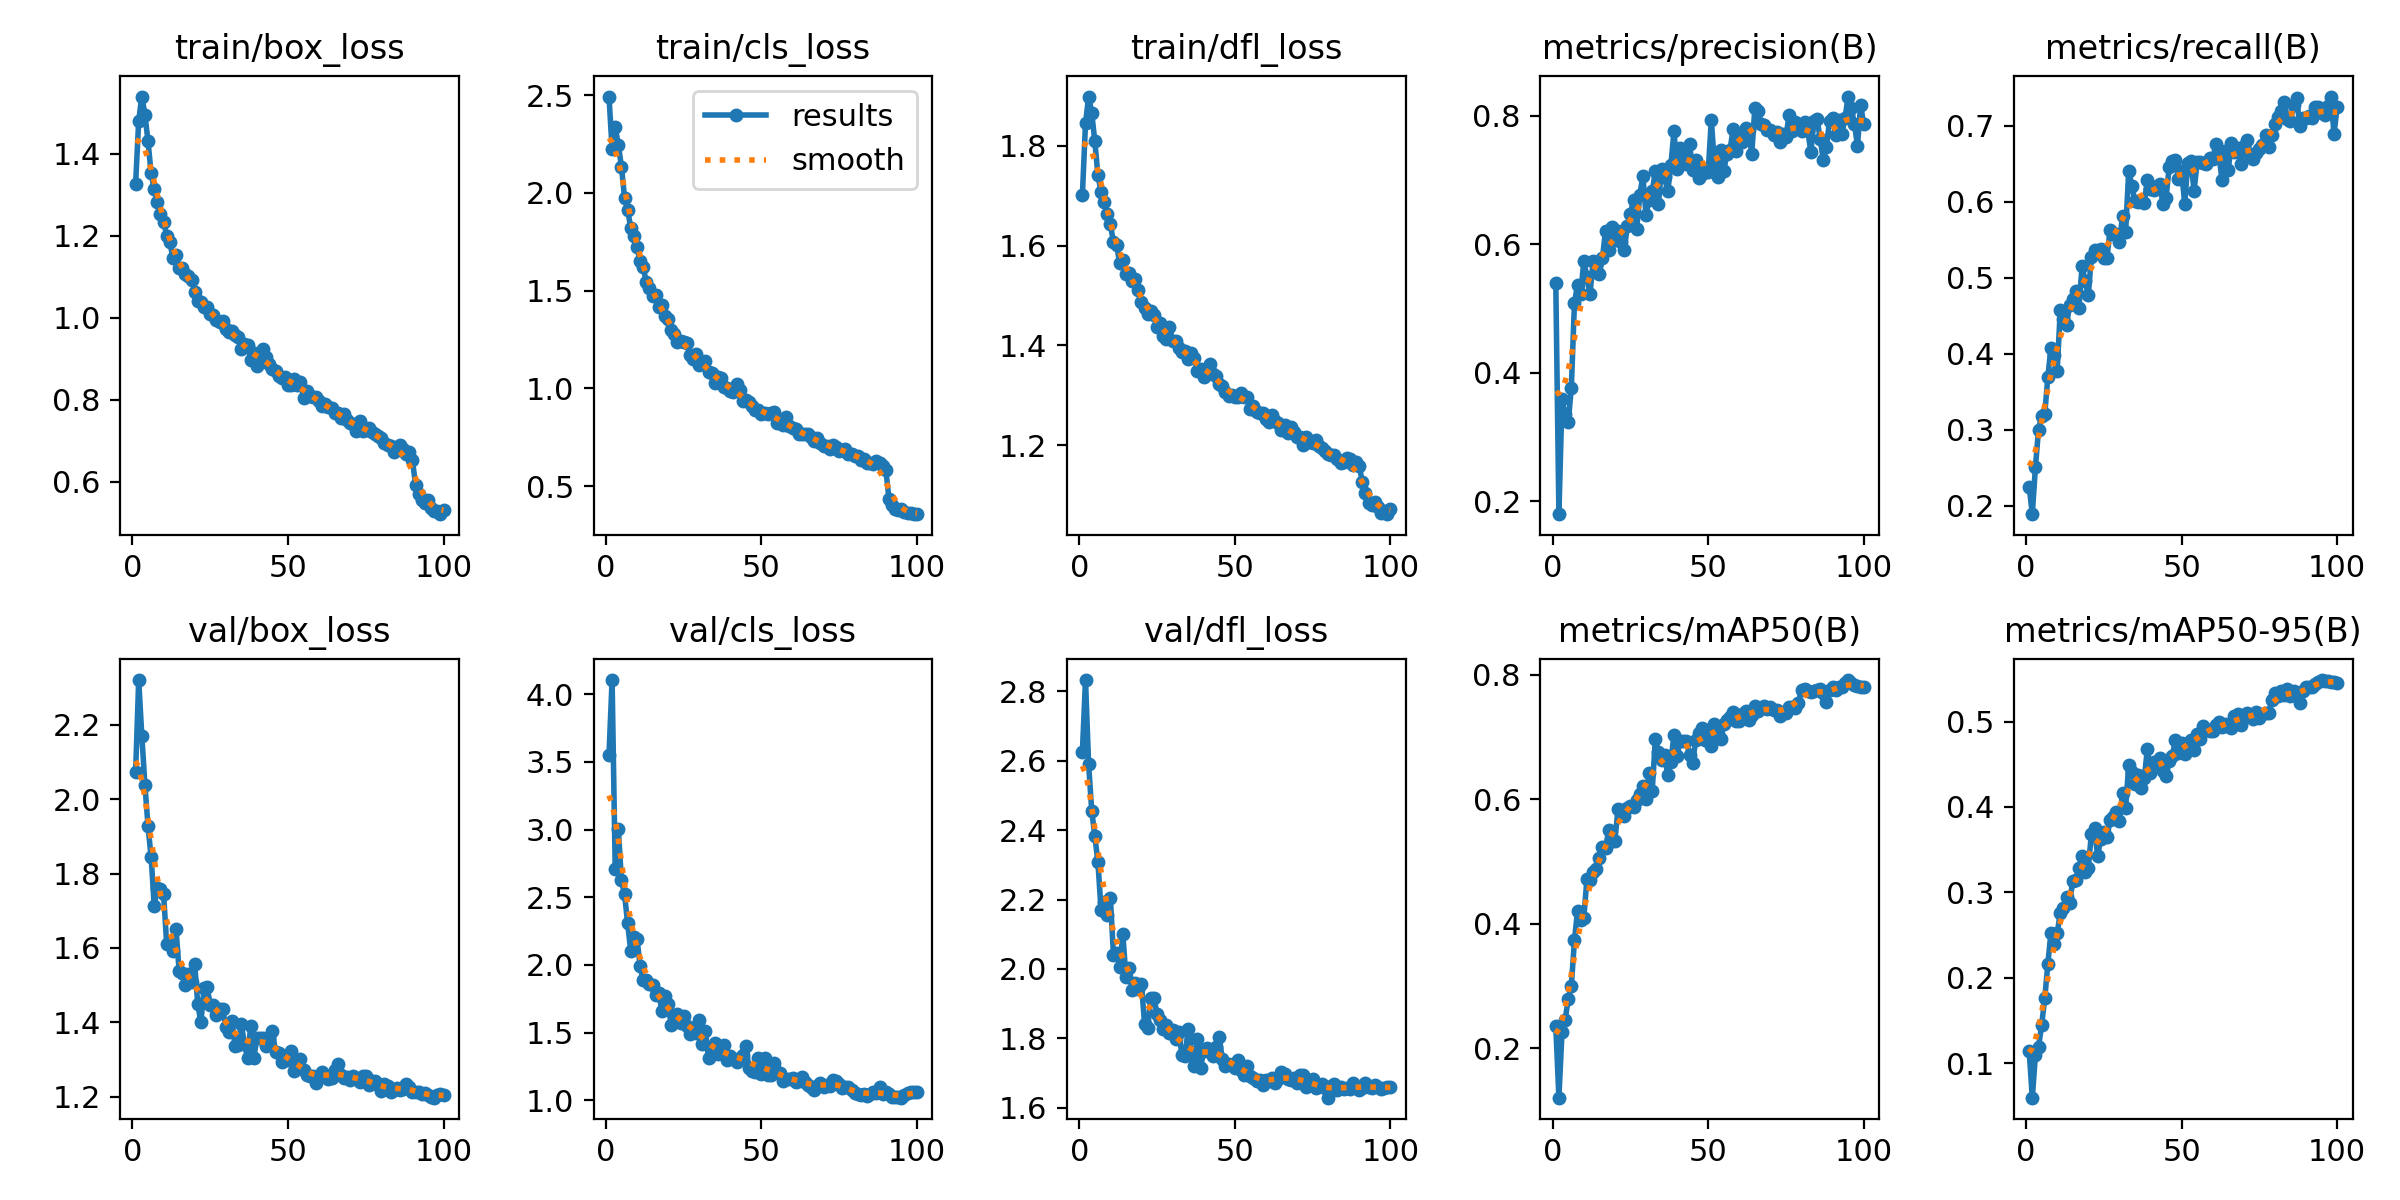

Mostrando: PR_curve.png


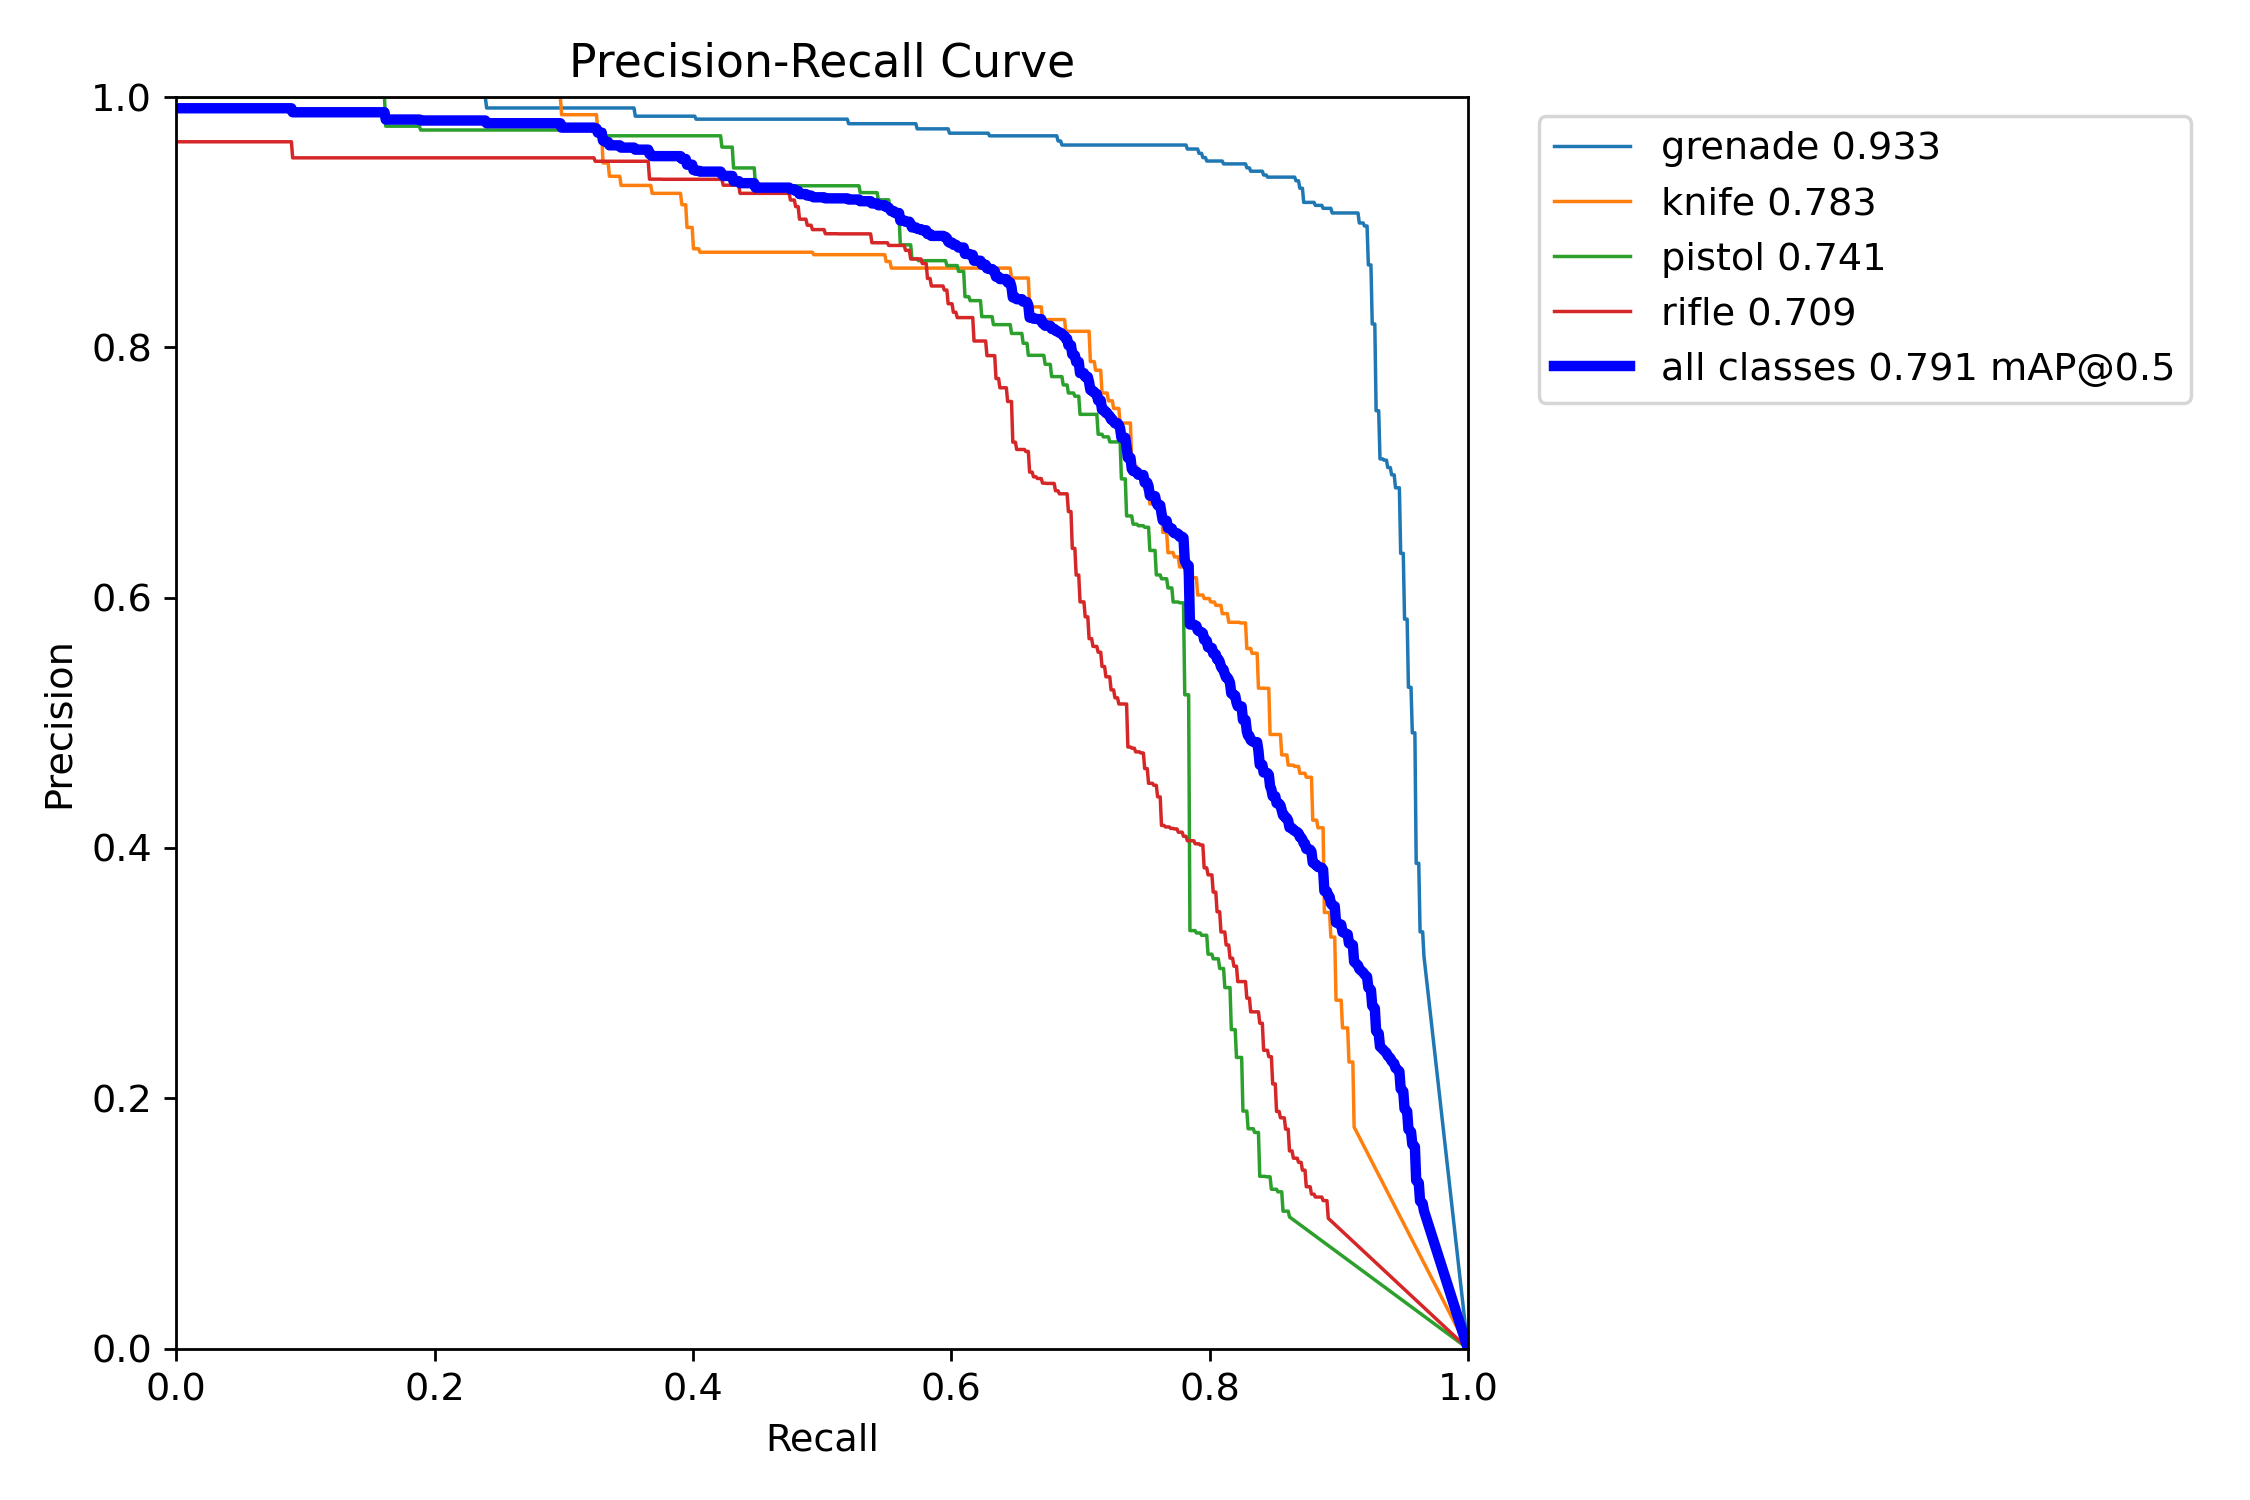

Mostrando: confusion_matrix.png


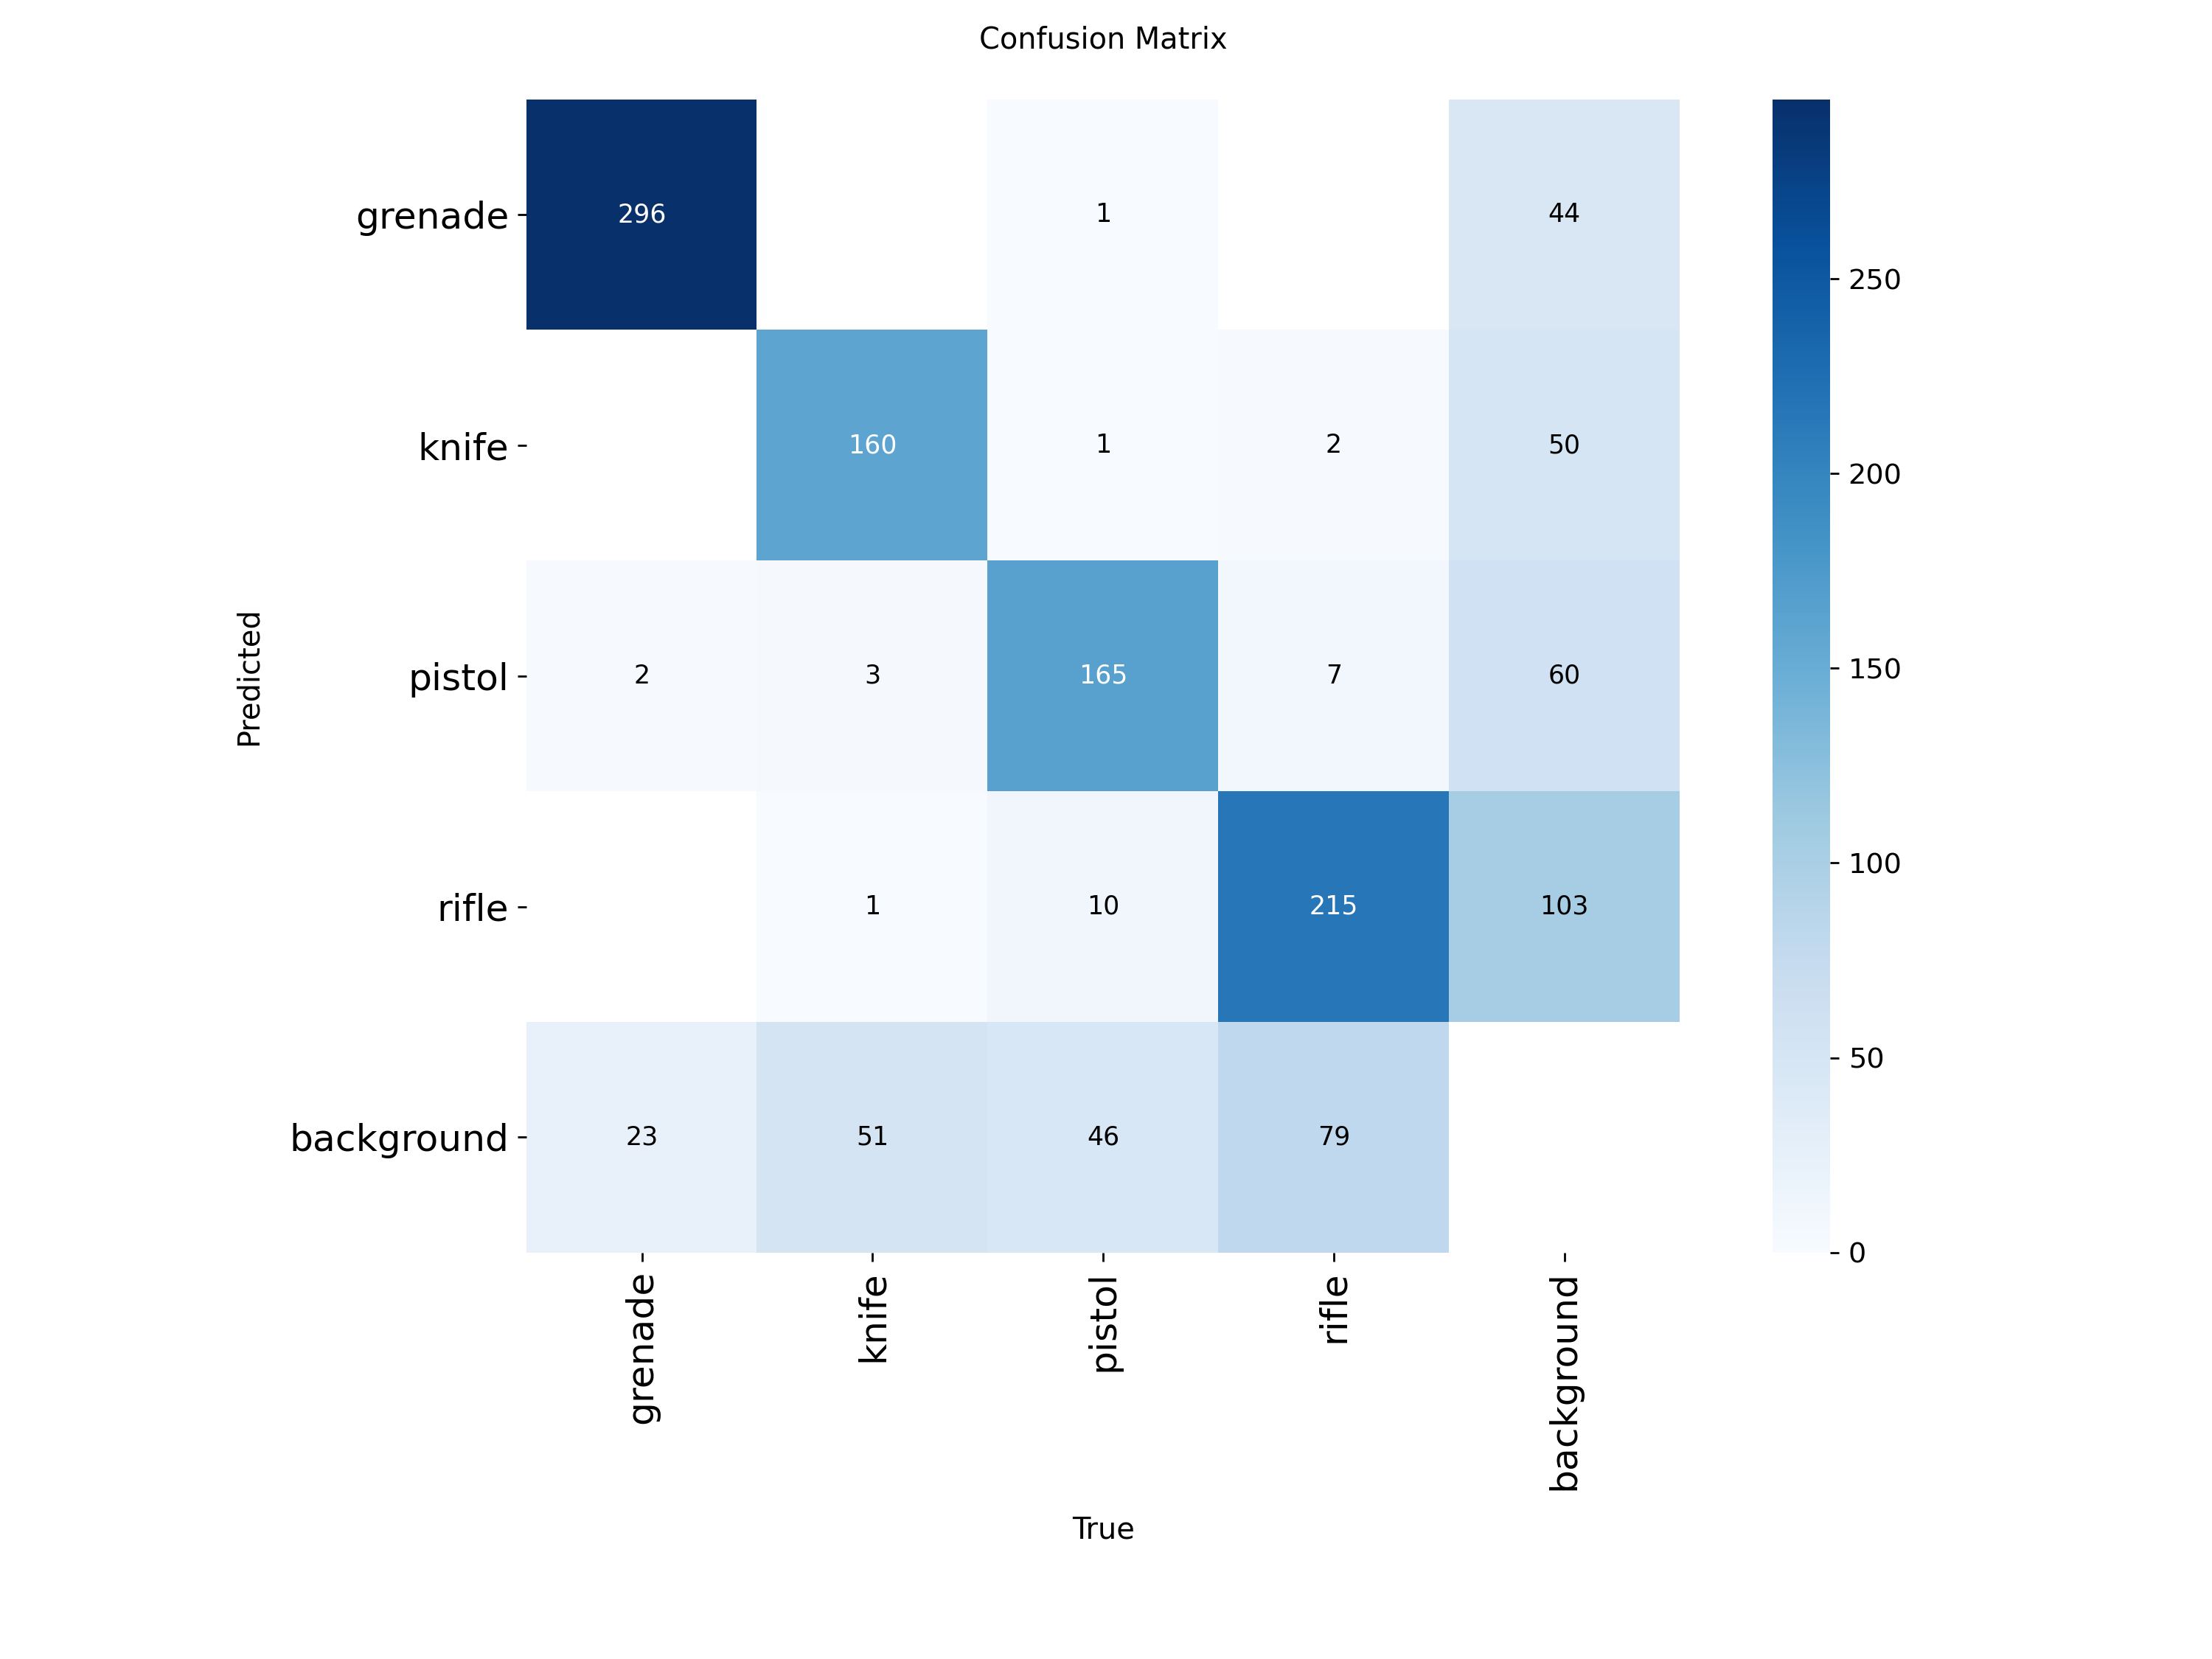

Mostrando: F1_curve.png


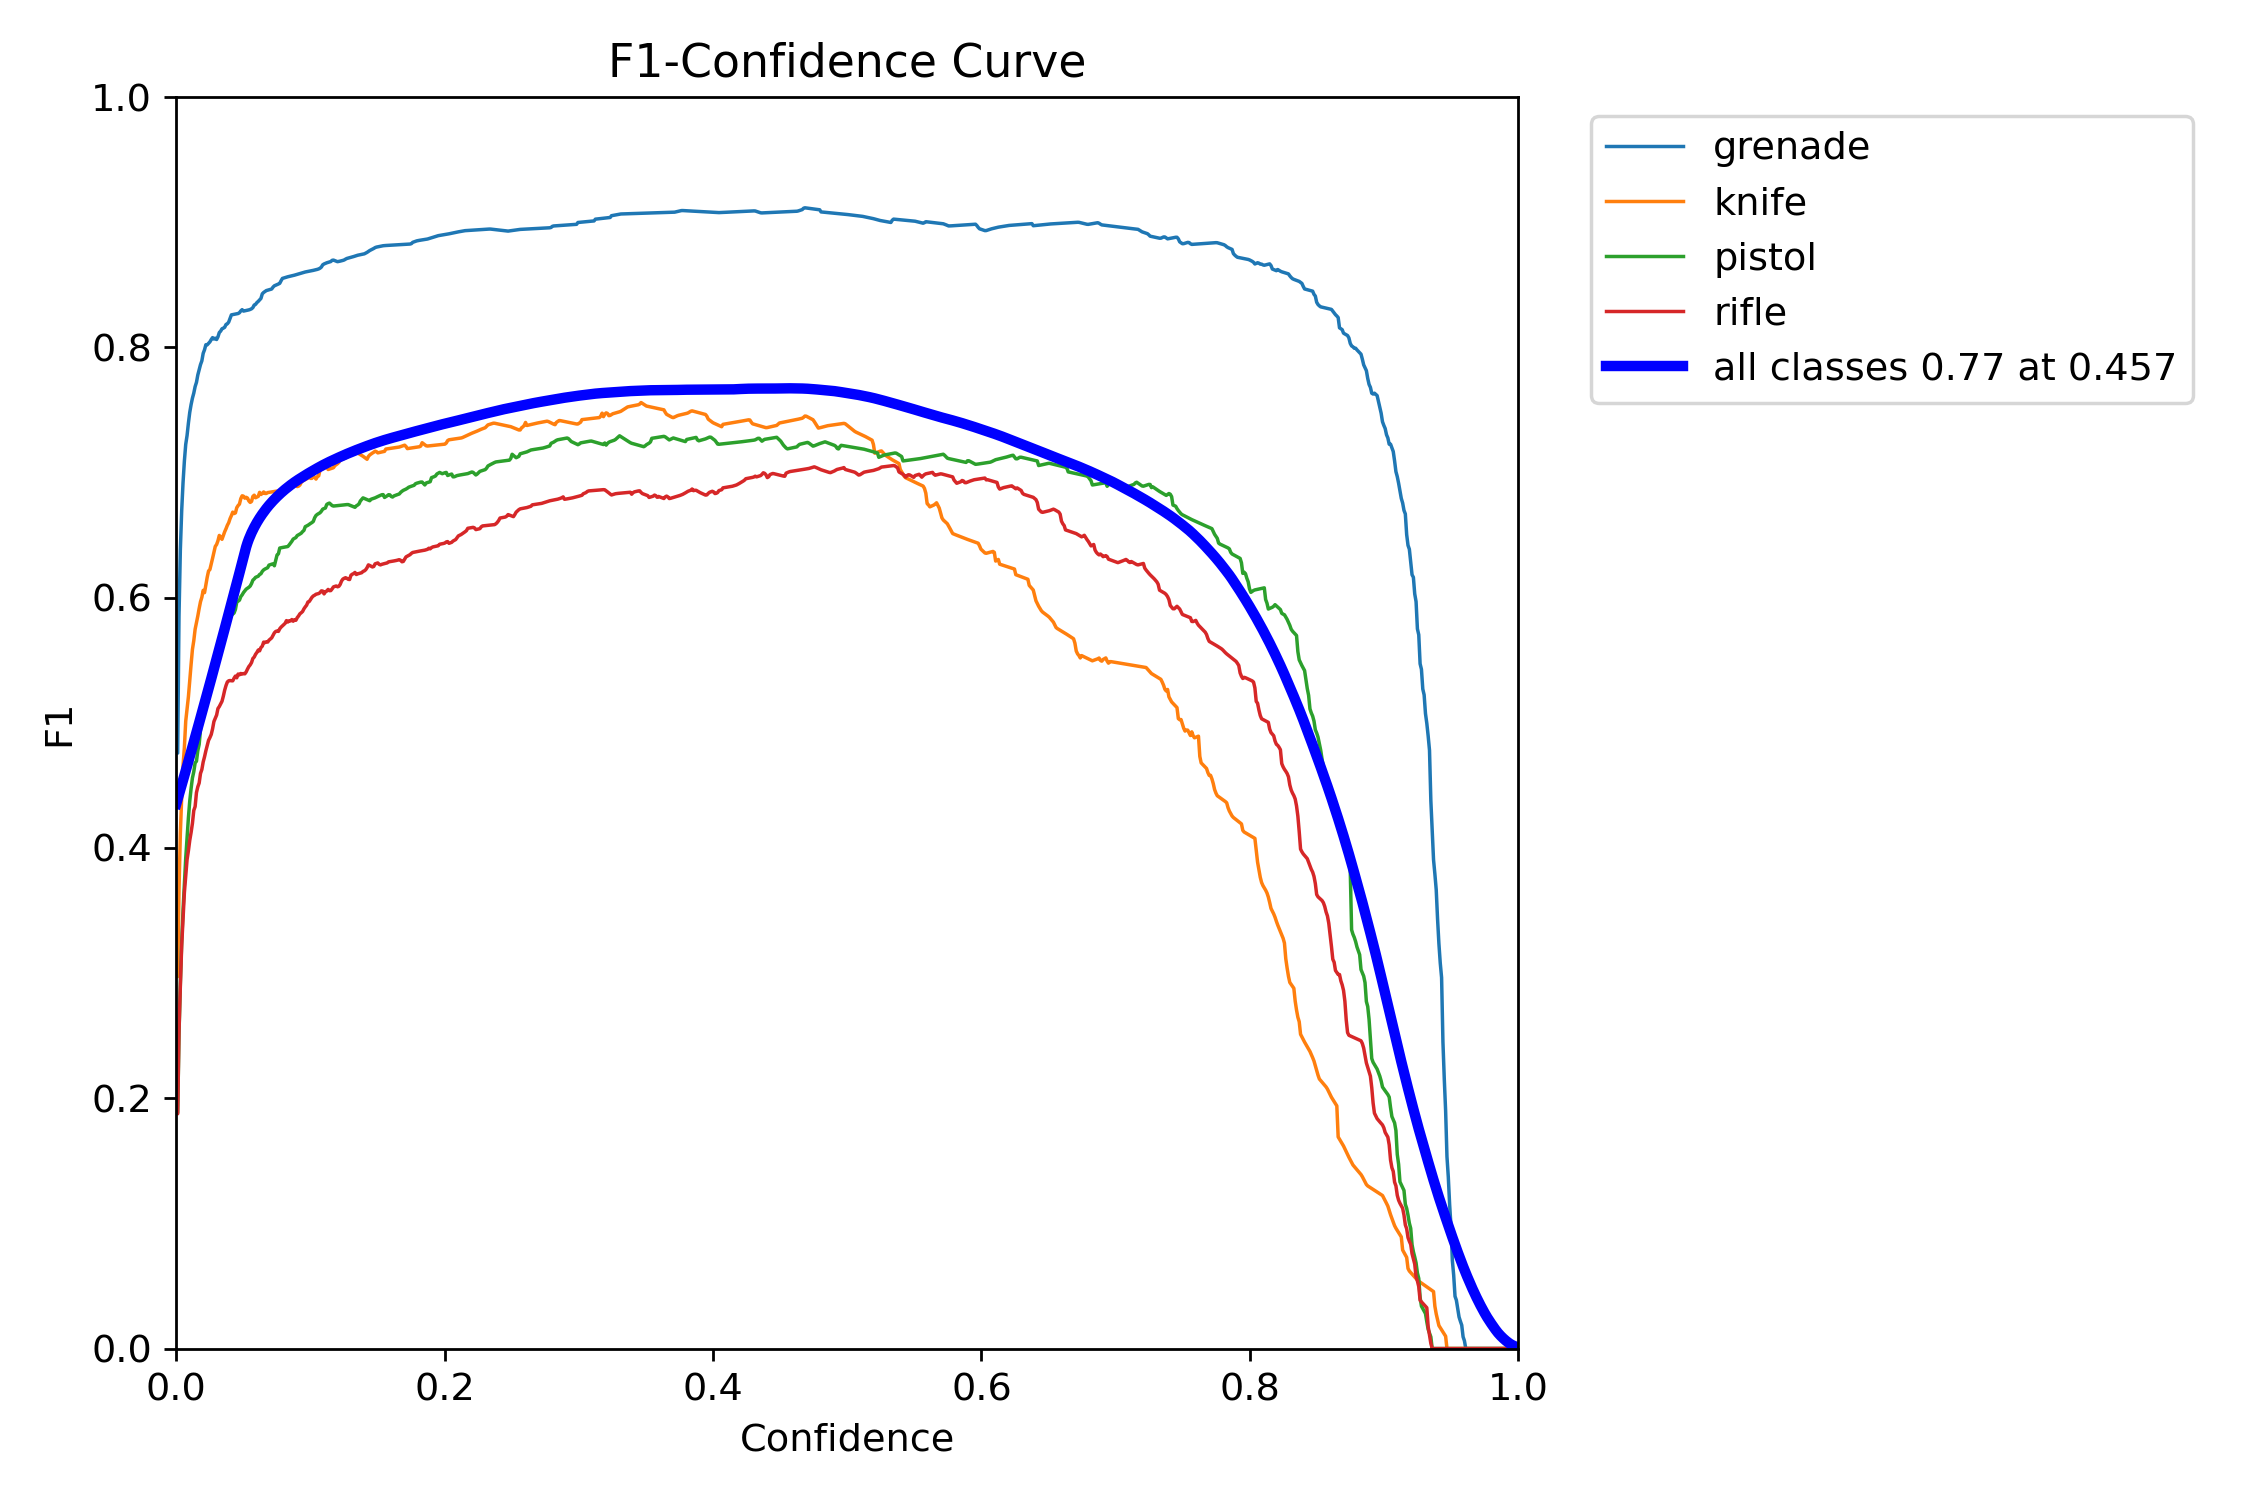

Mostrando: val_batch0_pred.jpg


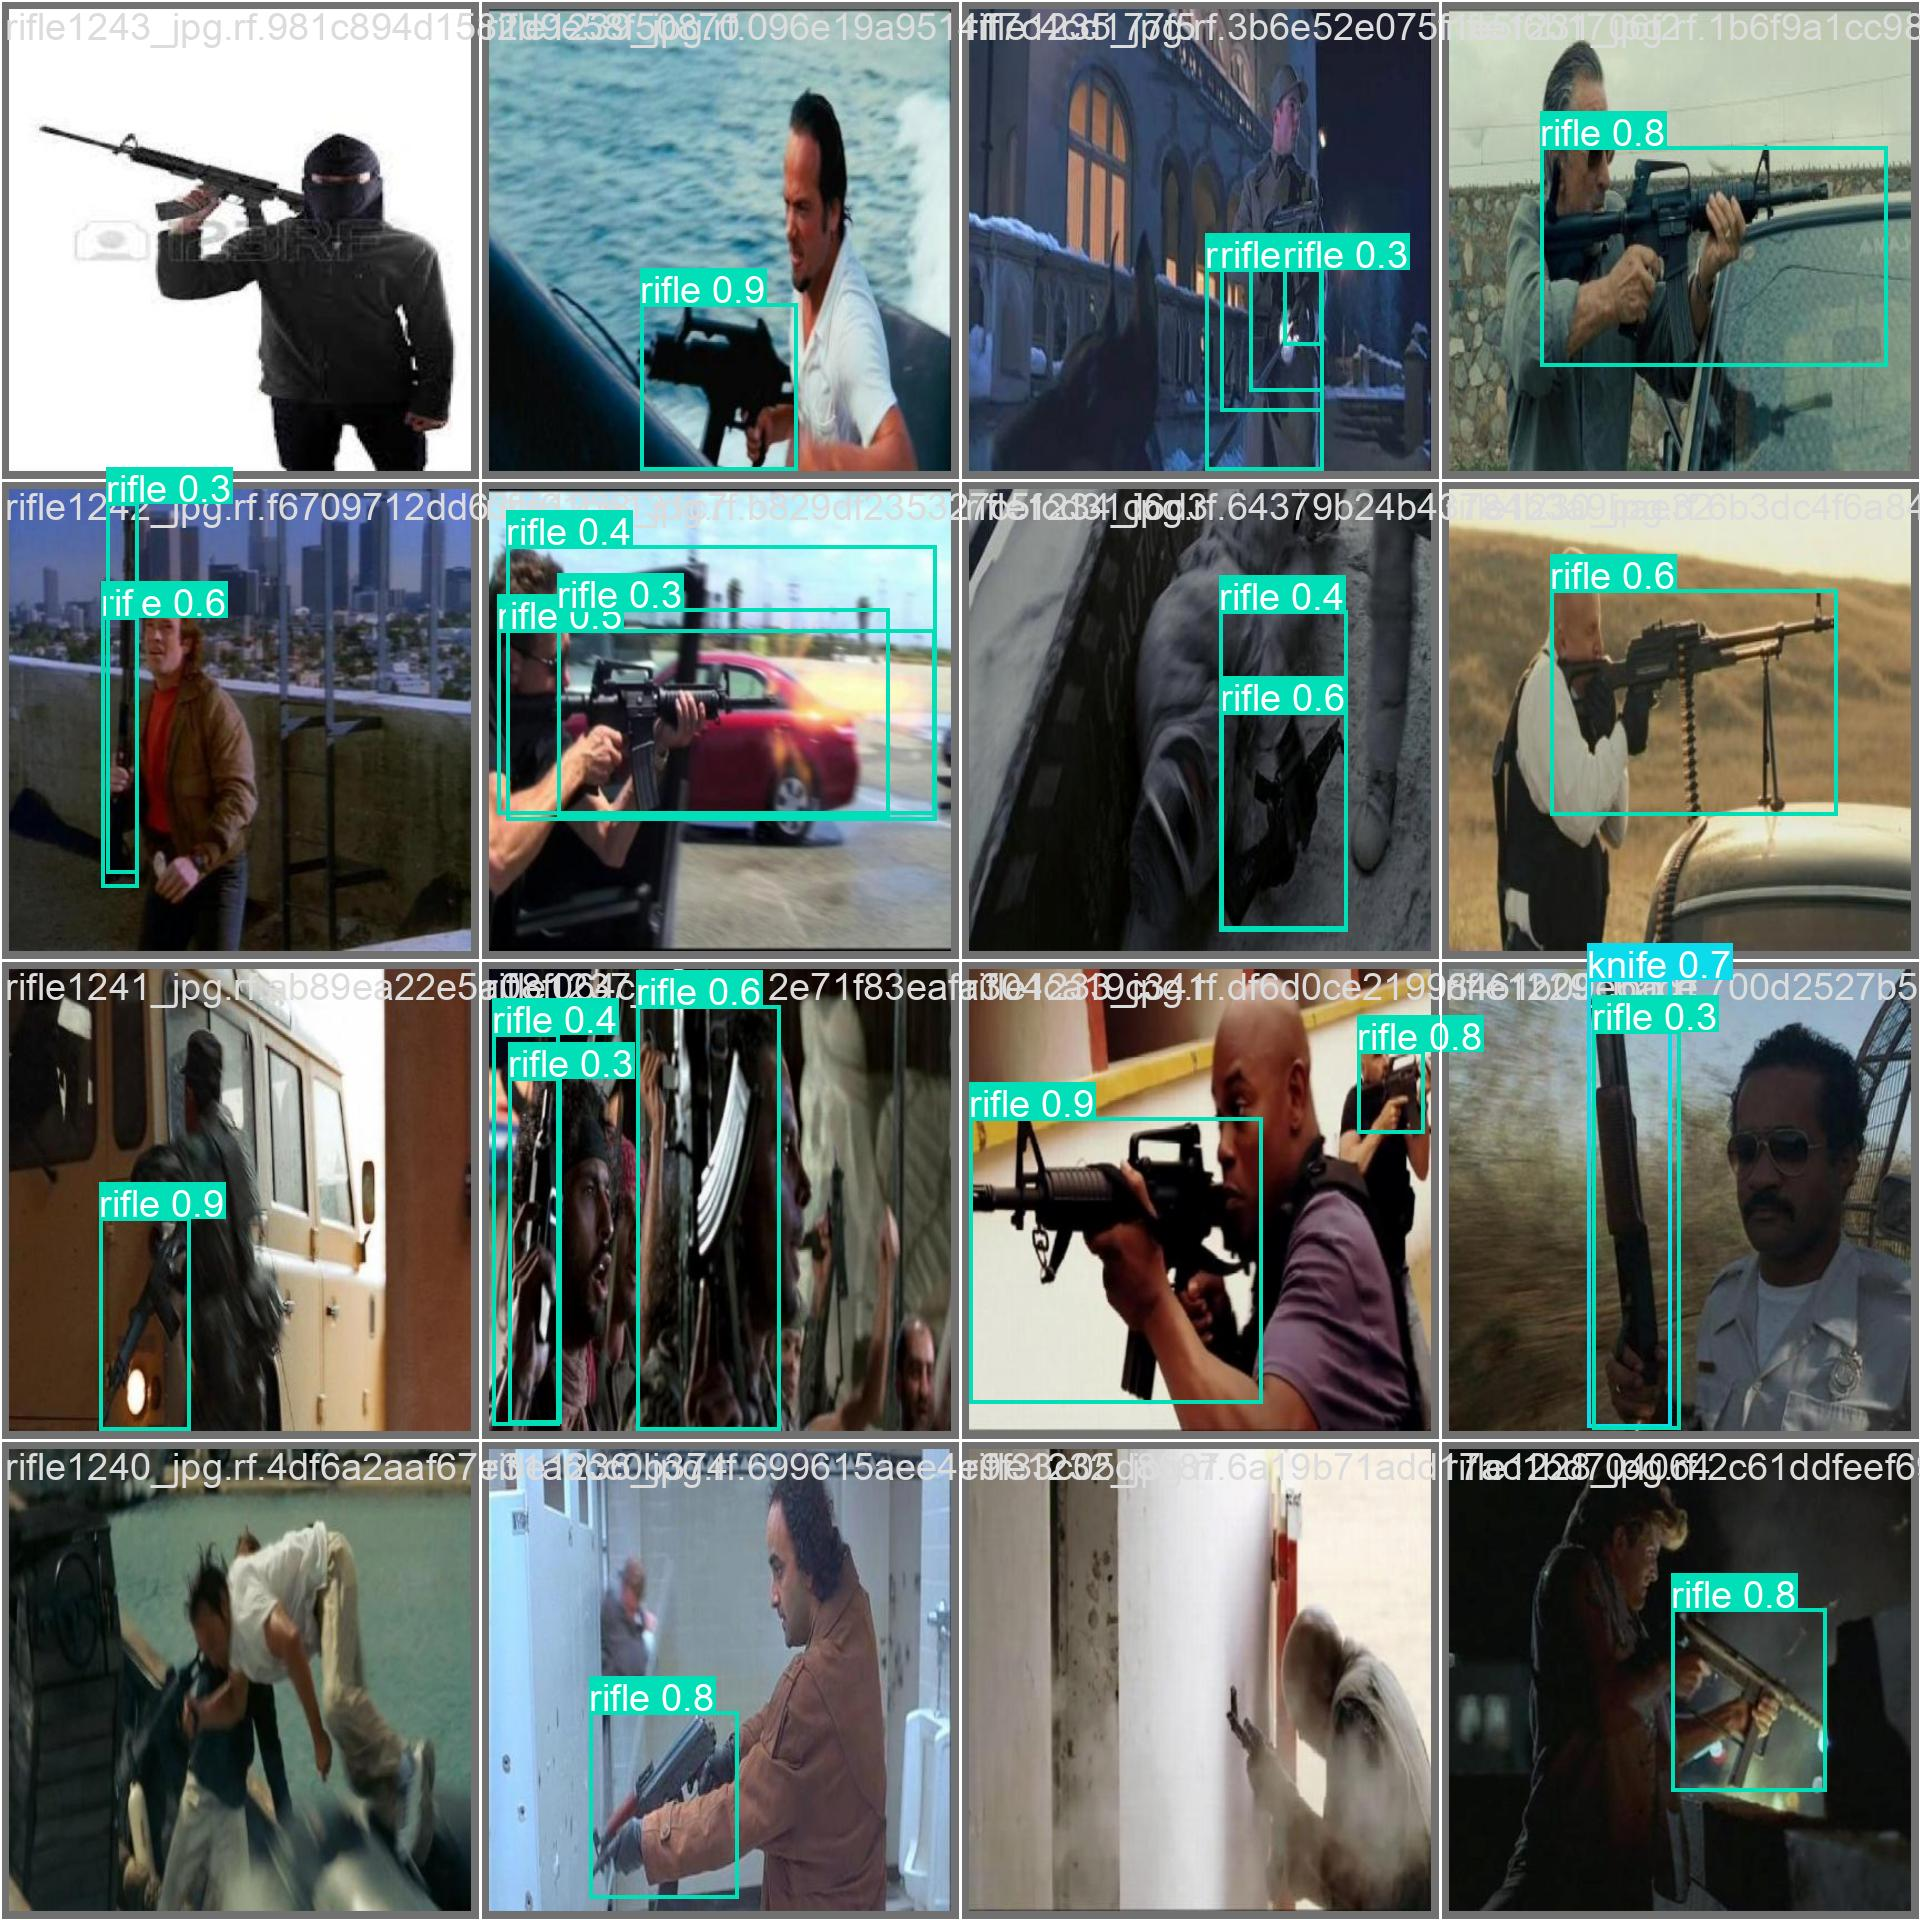

In [26]:
exp_path = '/content/runs_v8s/detect/train/'
import os

images_to_show = [
    'results.png',
    'PR_curve.png',
    'confusion_matrix.png',
    'F1_curve.png',
    'val_batch0_pred.jpg'
]

for img_name in images_to_show:
    img_path = os.path.join(exp_path, img_name)
    if os.path.exists(img_path):
        print(f"Mostrando: {img_name}")
        display(Image(filename=img_path))
    else:
        print(f"❌ No encontrado: {img_name}")


*   YOLOV12S

Mostrando: results.png


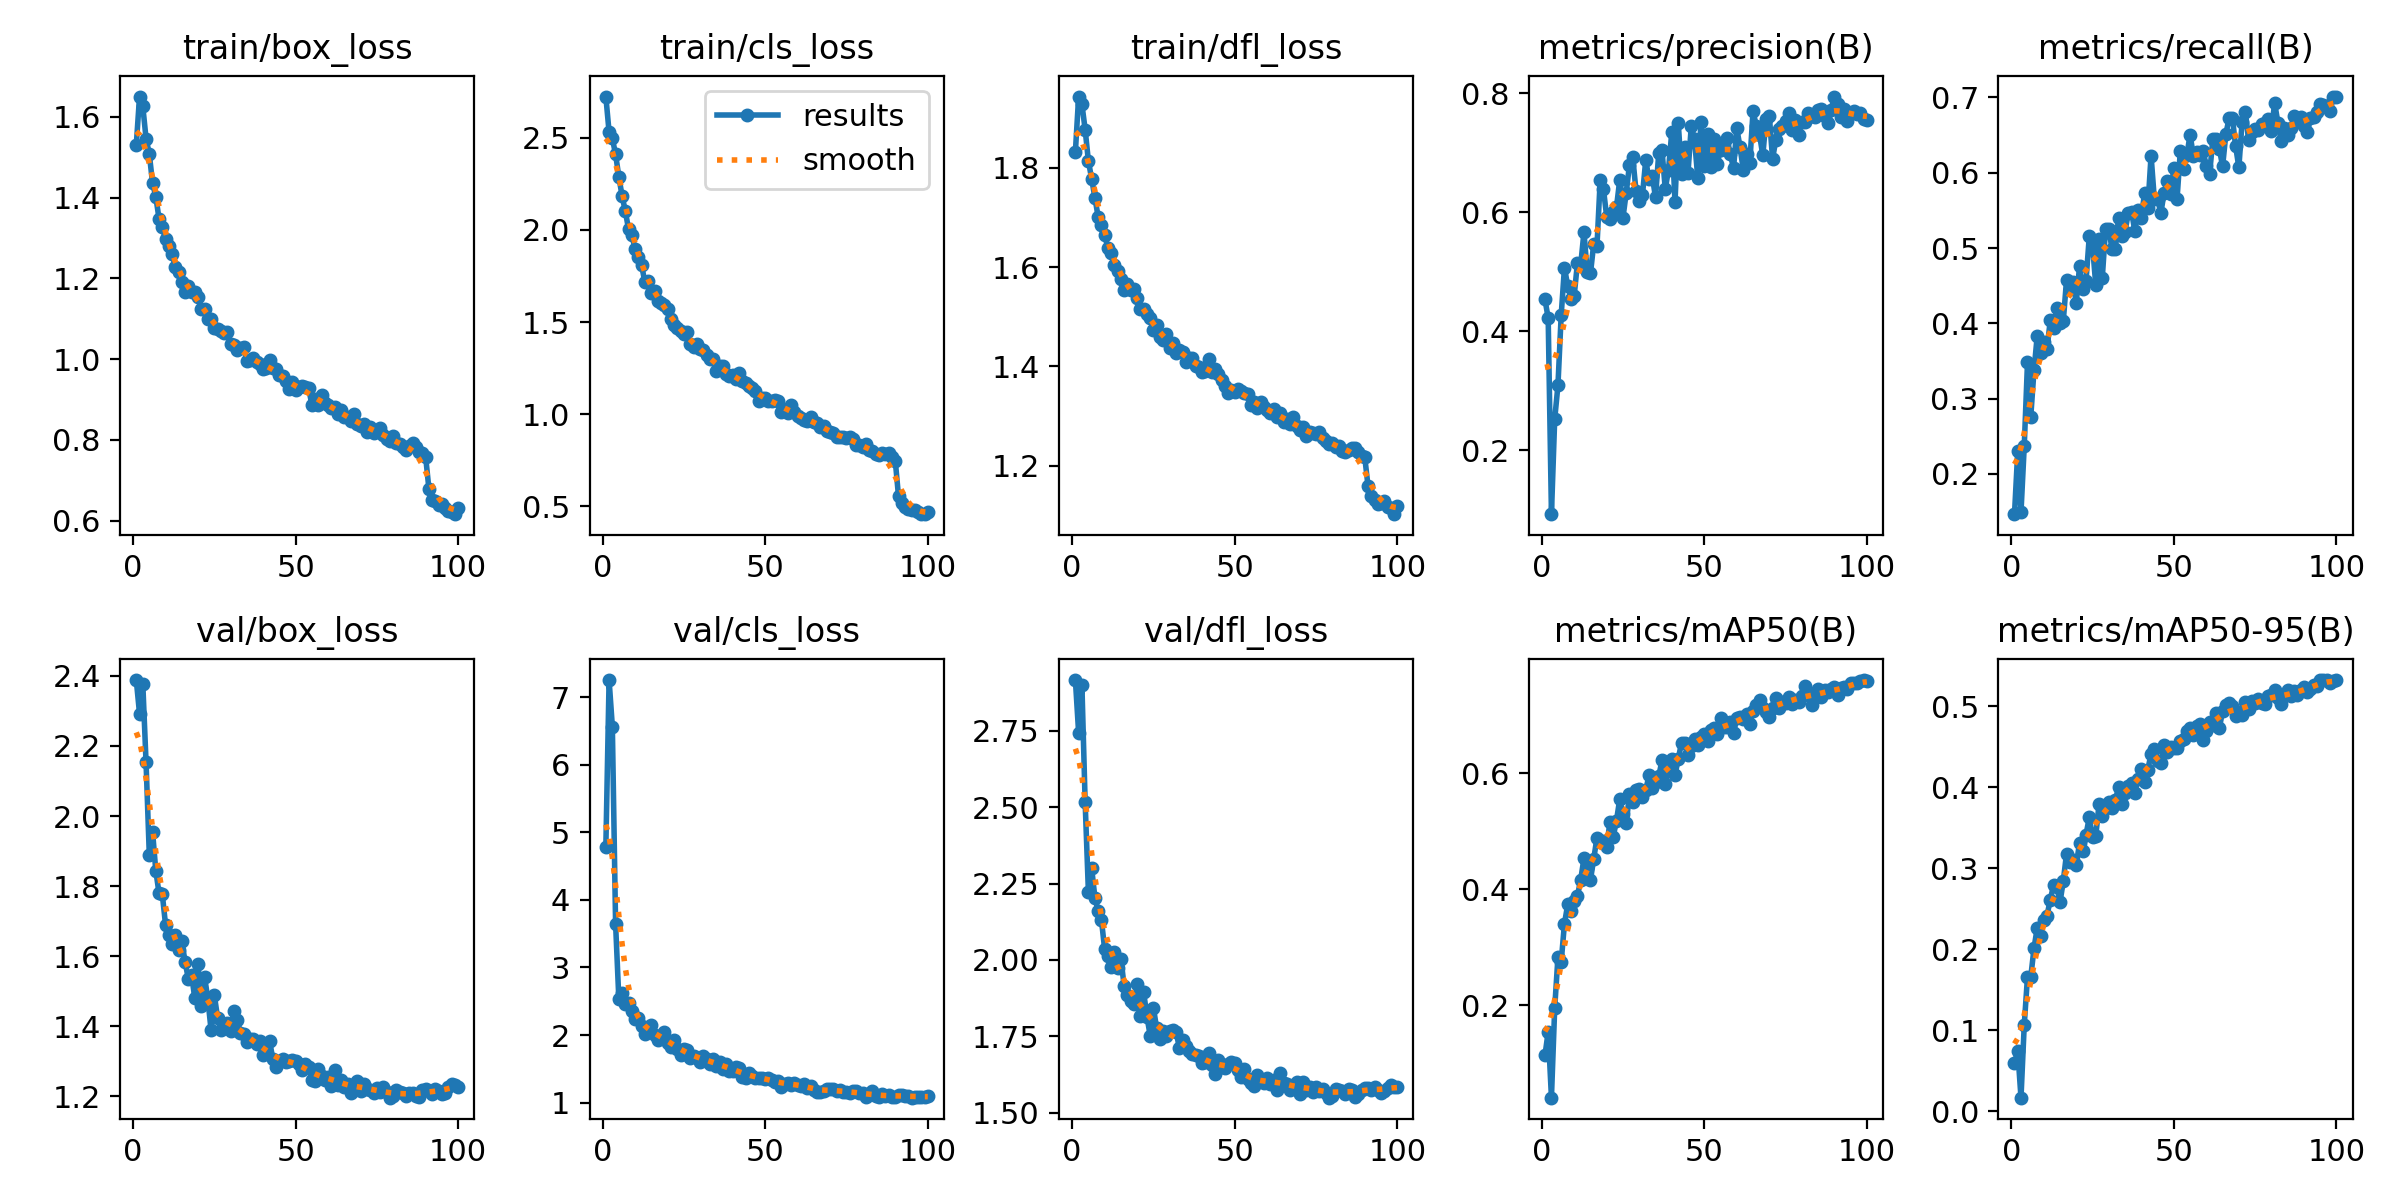

Mostrando: PR_curve.png


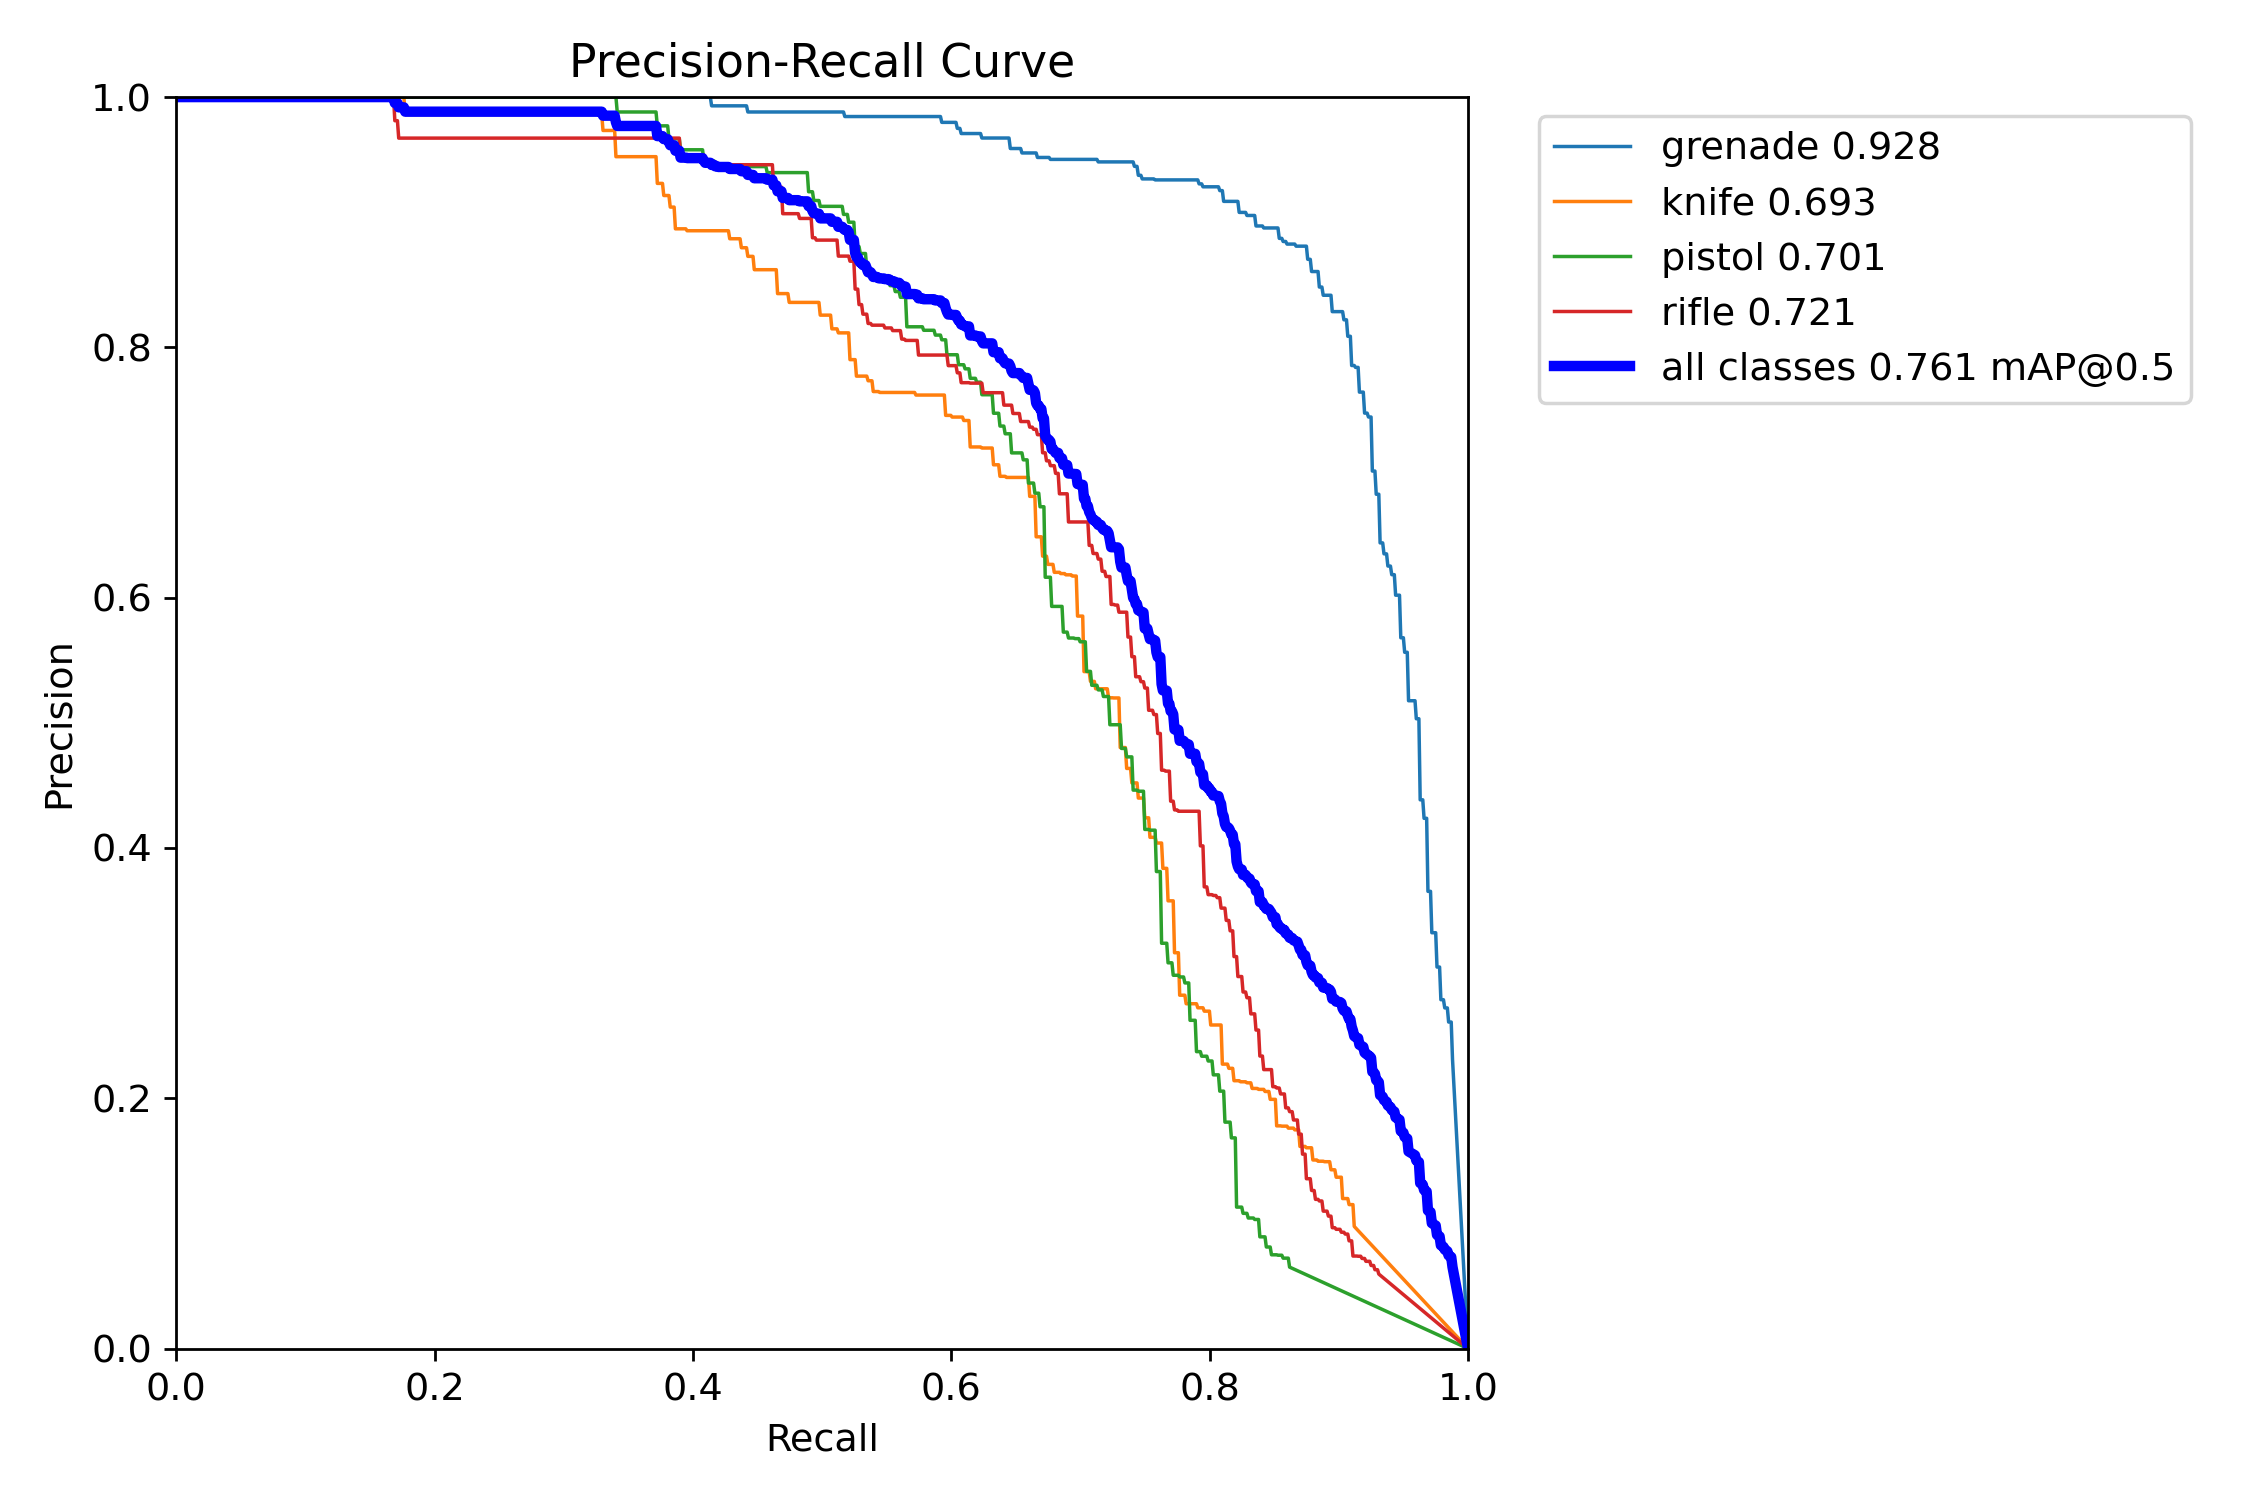

Mostrando: confusion_matrix.png


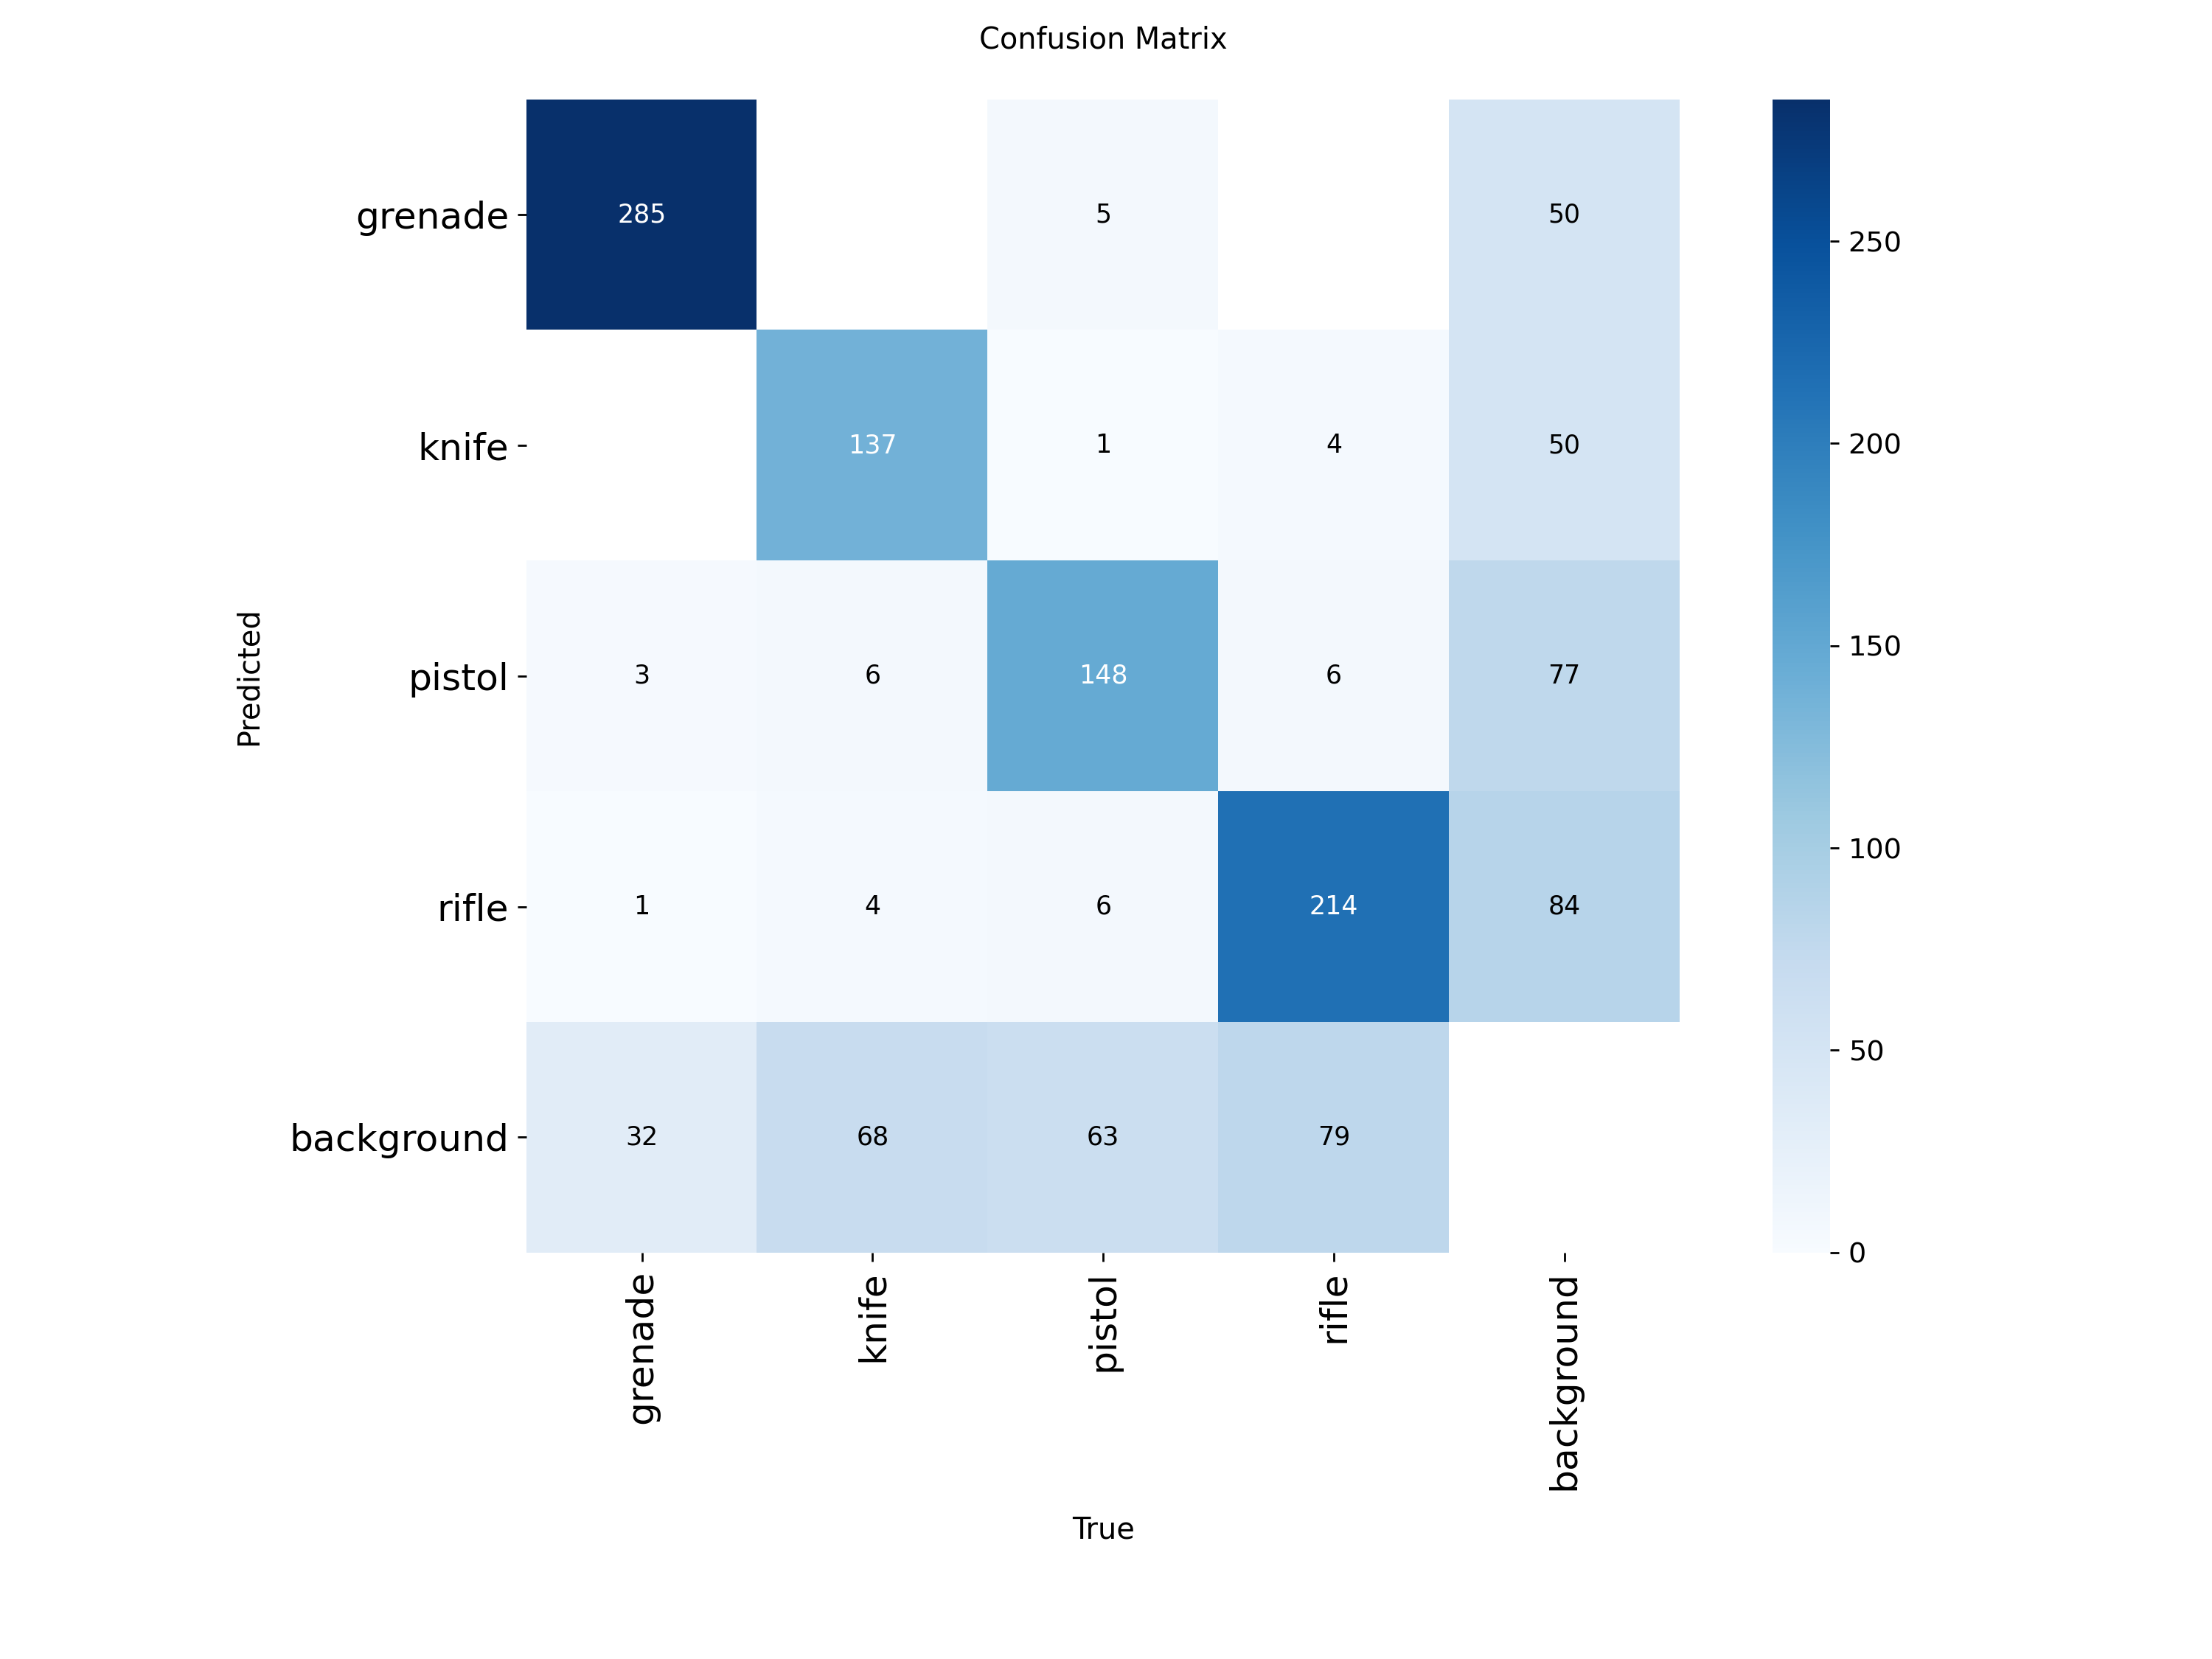

Mostrando: F1_curve.png


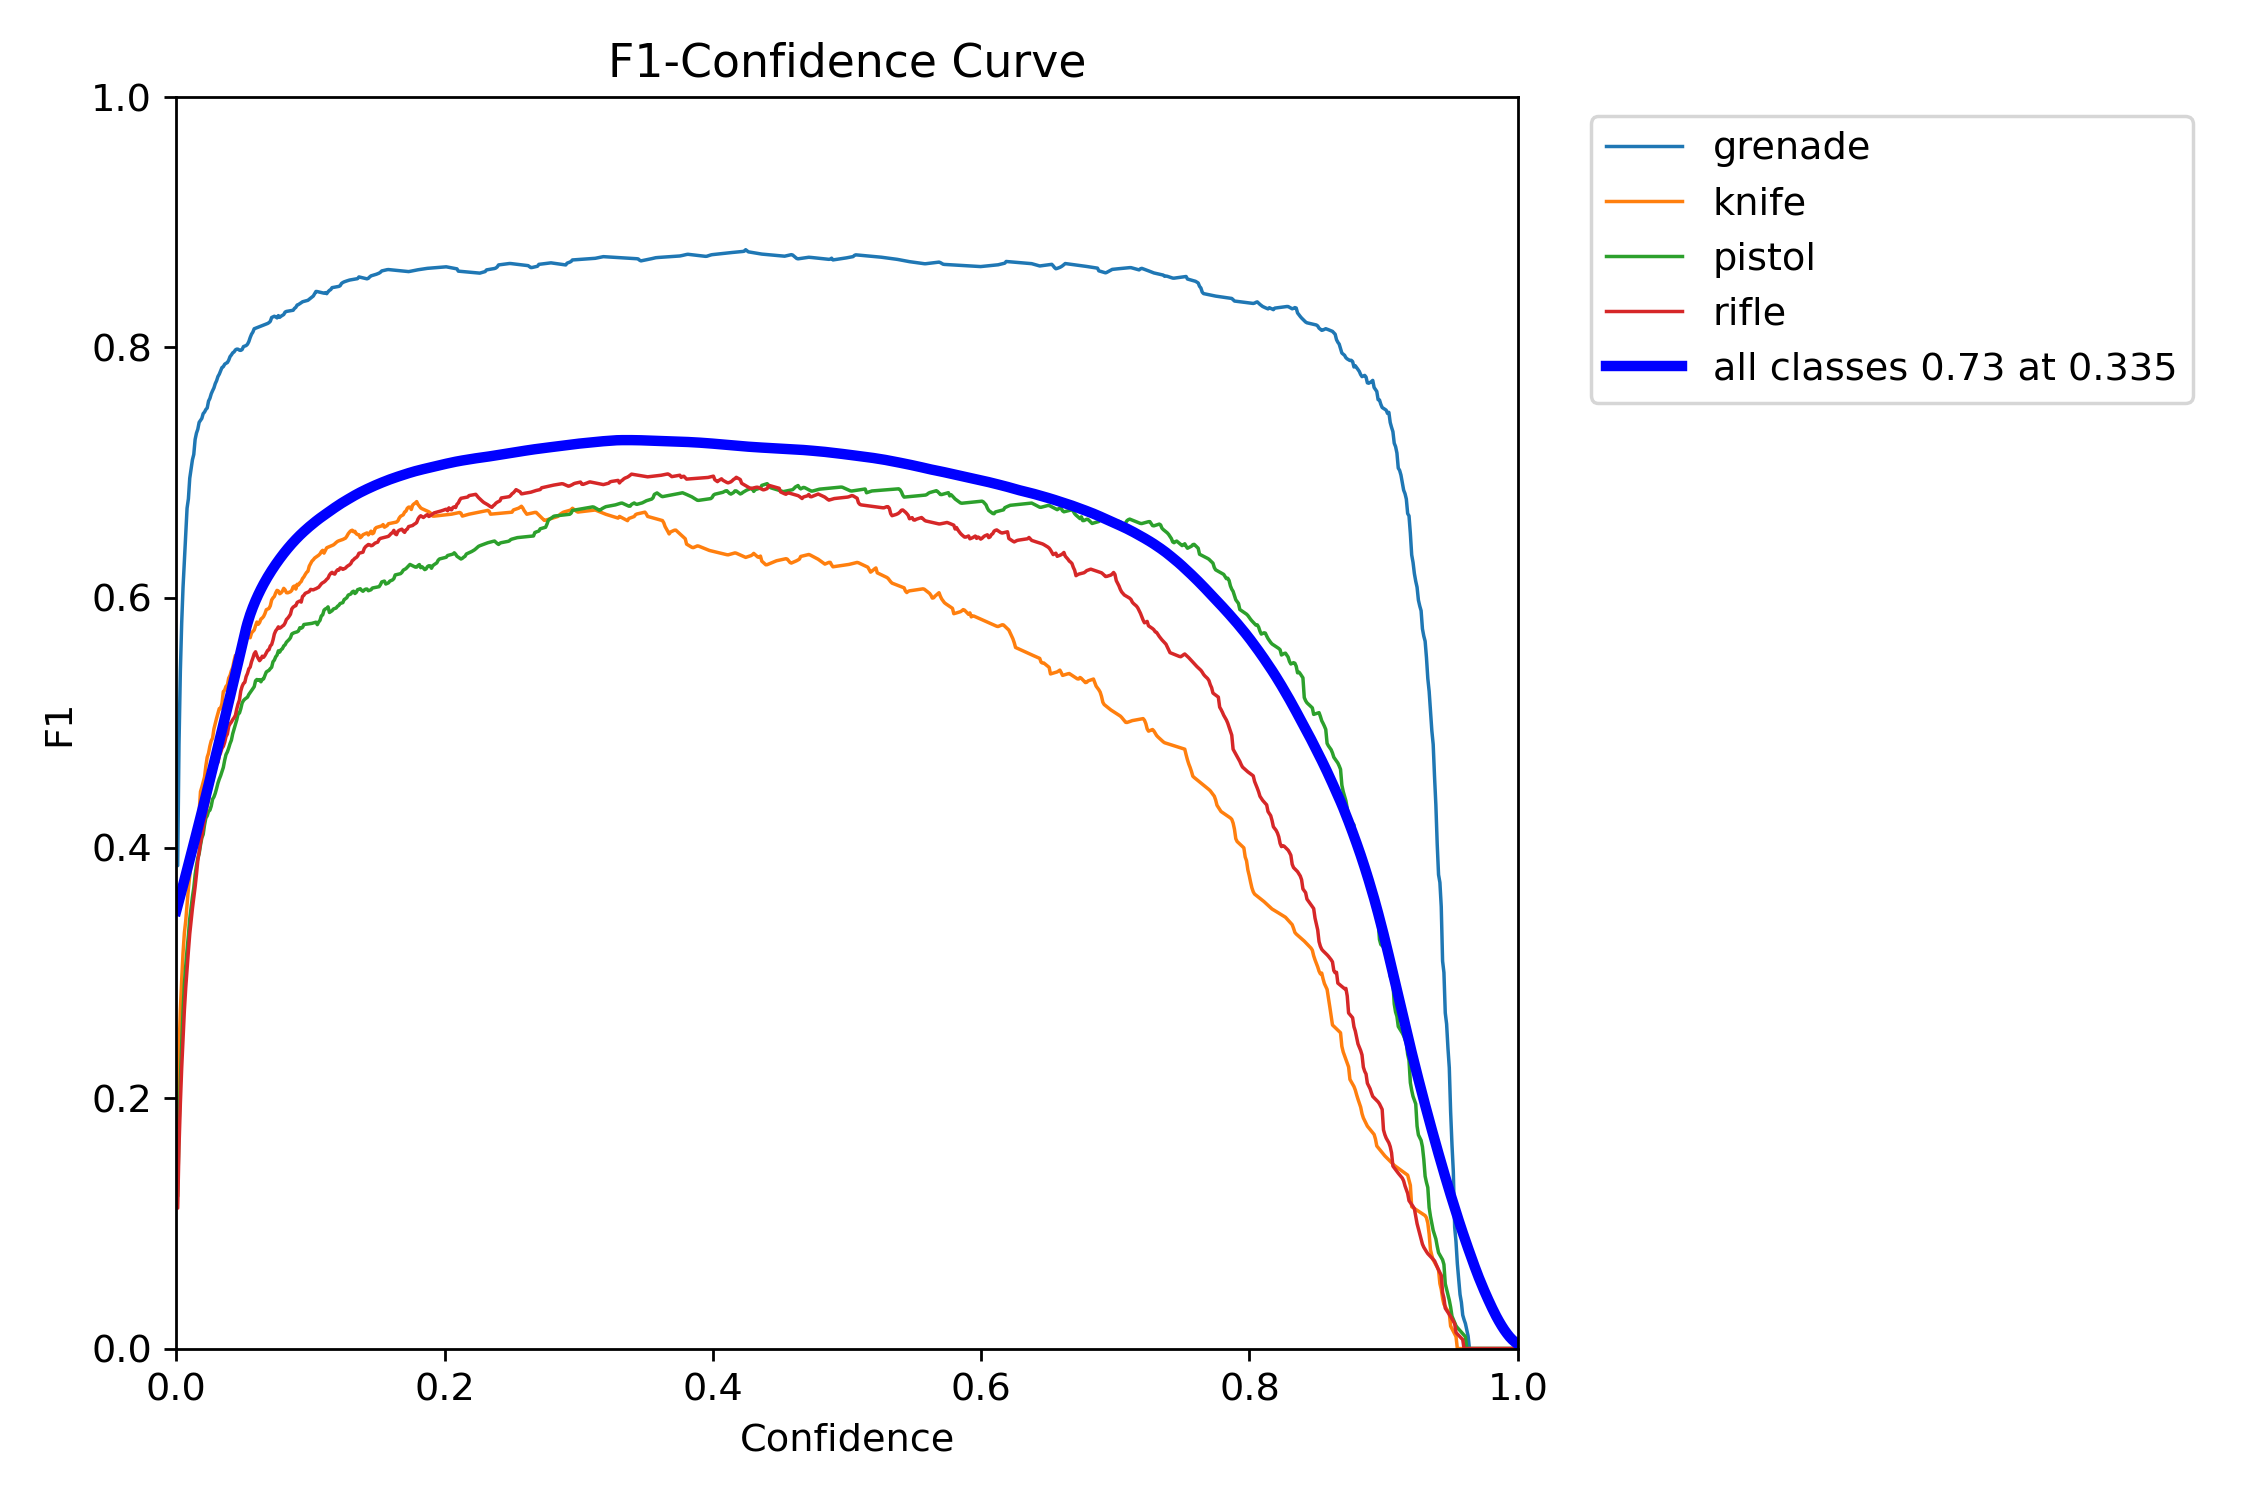

Mostrando: val_batch0_pred.jpg


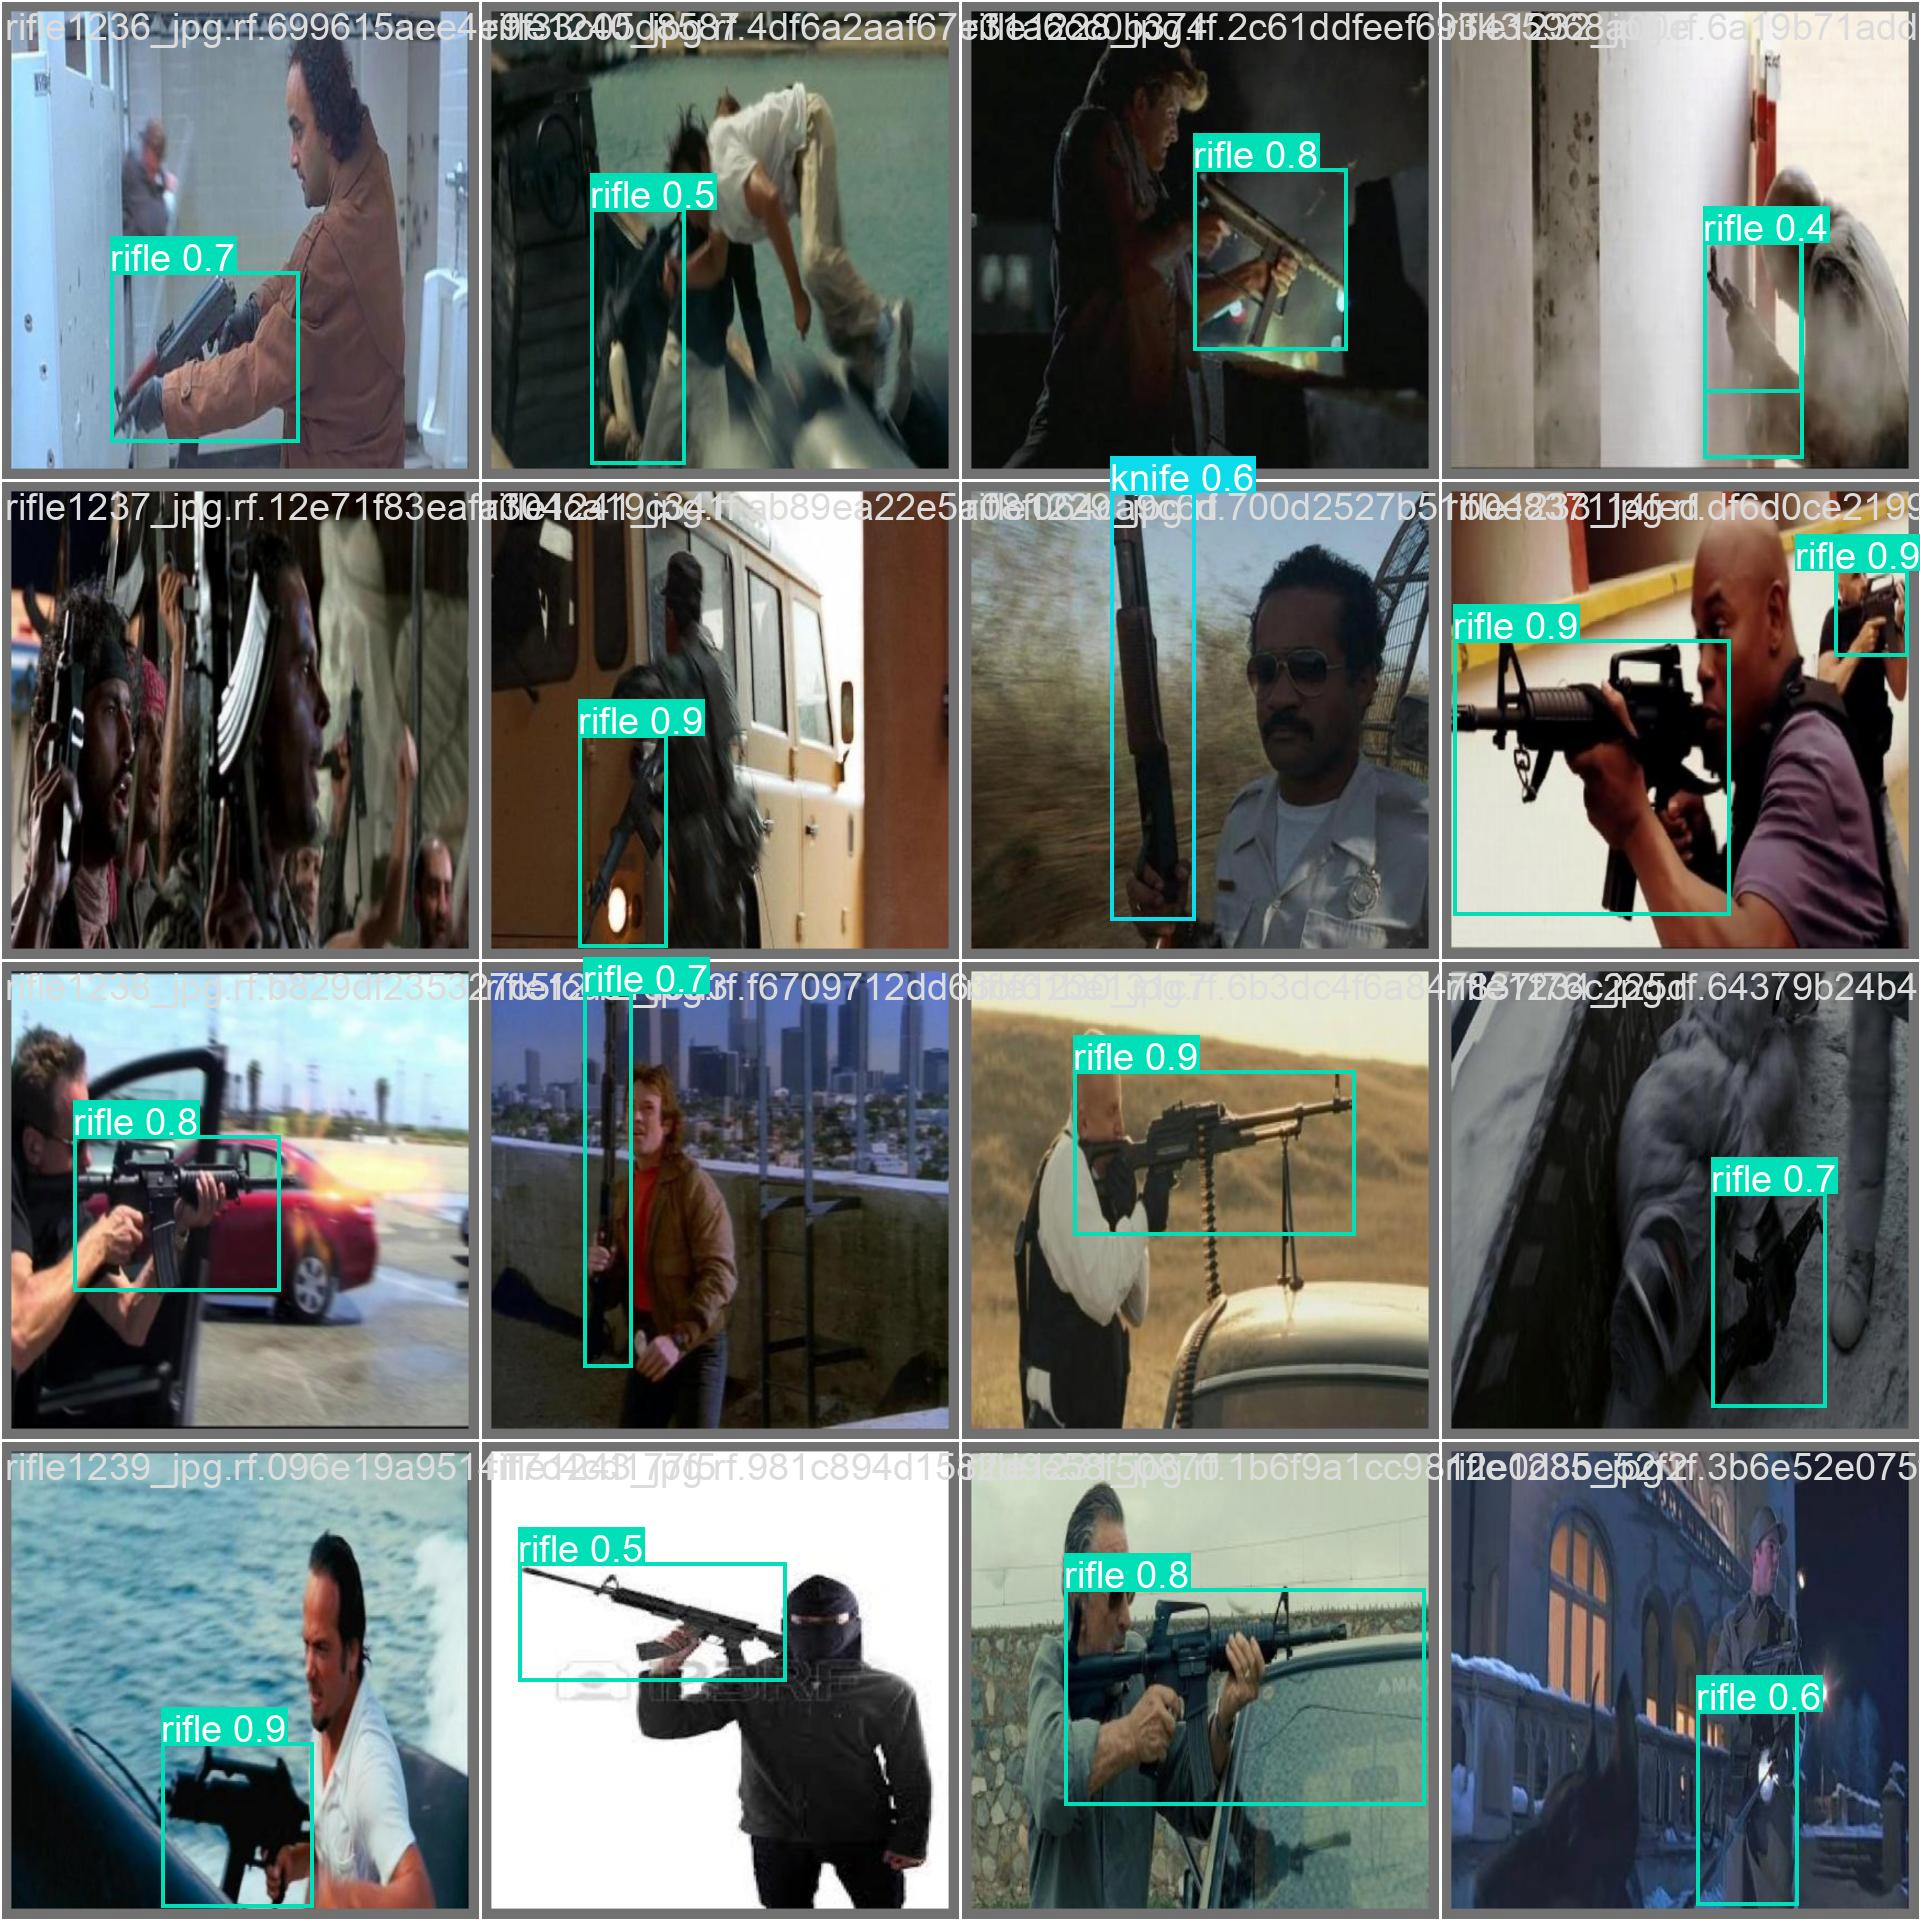

In [27]:
exp_path = '/content/runs_v12s/detect/train/'
import os

images_to_show = [
    'results.png',
    'PR_curve.png',
    'confusion_matrix.png',
    'F1_curve.png',
    'val_batch0_pred.jpg'
]

for img_name in images_to_show:
    img_path = os.path.join(exp_path, img_name)
    if os.path.exists(img_path):
        print(f"Mostrando: {img_name}")
        display(Image(filename=img_path))
    else:
        print(f"❌ No encontrado: {img_name}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
import zipfile

# Ruta al ZIP
zip_path = '/content/runs.zip'

# Extraerlo en /content
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
v5_path = '/content/runs_v5s/train/detect-armas2'
v8_path = '/content/runs_v8s/detect/train'
v12_path = '/content/runs_v12s/detect/train'

In [ ]:
def cargar_resultados(path):
    csv_path = os.path.join(path, 'results.csv')
    if os.path.exists(csv_path):
        return pd.read_csv(csv_path)
    else:
        print(f"No se encontró: {csv_path}")
        return None

In [ ]:
df_v5 = cargar_resultados(v5_path)
df_v8 = cargar_resultados(v8_path)
df_v12 = cargar_resultados(v12_path)

In [ ]:
def limpiar_columnas(df):
    df.columns = df.columns.str.strip()
    return df

# Limpiar nombres de columnas
df_v5 = limpiar_columnas(df_v5)
df_v8 = limpiar_columnas(df_v8)
df_v12 = limpiar_columnas(df_v12)

def obtener_metricas_finales(df):
    columnas = df.columns

    def buscar_columna(posibles_nombres):
        for nombre in posibles_nombres:
            if nombre in columnas:
                return nombre
        return None

    col_precision = buscar_columna(['metrics/precision', 'metrics/precision(B)'])
    col_recall = buscar_columna(['metrics/recall', 'metrics/recall(B)'])
    col_map50 = buscar_columna(['metrics/mAP_0.5', 'metrics/mAP50(B)'])
    col_map95 = buscar_columna(['metrics/mAP_0.5:0.95', 'metrics/mAP50-95(B)'])

    return {
        'Precision': df[col_precision].iloc[-1] if col_precision else None,
        'Recall': df[col_recall].iloc[-1] if col_recall else None,
        'mAP@0.5': df[col_map50].iloc[-1] if col_map50 else None,
        'mAP@0.5:0.95': df[col_map95].iloc[-1] if col_map95 else None
    }

In [ ]:
print("Columnas YOLOv5:")
print(df_v5.columns.tolist())

print("\nColumnas YOLOv8:")
print(df_v8.columns.tolist())

print("\nColumnas YOLOv12:")
print(df_v12.columns.tolist())

Columnas YOLOv5:
['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss', 'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss', 'x/lr0', 'x/lr1', 'x/lr2']

Columnas YOLOv8:
['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']

Columnas YOLOv12:
['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


In [ ]:
metricas_v5 = obtener_metricas_finales(df_v5)
metricas_v8 = obtener_metricas_finales(df_v8)
metricas_v12 = obtener_metricas_finales(df_v12)

In [ ]:
df_metricas = pd.DataFrame([
    {'Modelo': 'YOLOv5s', **metricas_v5},
    {'Modelo': 'YOLOv8s', **metricas_v8},
    {'Modelo': 'YOLOv12s', **metricas_v12}
])

print("📌 Métricas Finales de Entrenamiento:")
print(df_metricas)

📌 Métricas Finales de Entrenamiento:
     Modelo  Precision   Recall  mAP@0.5  mAP@0.5:0.95
0   YOLOv5s    0.80183  0.70090  0.74750       0.48100
1   YOLOv8s    0.78656  0.72473  0.78009       0.54554
2  YOLOv12s    0.75515  0.70118  0.75901       0.53217


In [ ]:
#ultimo entrenamiento
df_metricas = pd.DataFrame([
    {'Modelo': 'YOLOv5s', **metricas_v5},
    {'Modelo': 'YOLOv8s', **metricas_v8},
    {'Modelo': 'YOLOv12s', **metricas_v12}
])

print("📌 Métricas Finales de Entrenamiento:")
print(df_metricas)

📌 Métricas Finales de Entrenamiento:
     Modelo  Precision   Recall  mAP@0.5  mAP@0.5:0.95
0   YOLOv5s    0.73969  0.66662  0.69362       0.42625
1   YOLOv8s    0.78656  0.72473  0.78009       0.54554
2  YOLOv12s    0.75515  0.70118  0.75901       0.53217


⚠️ En este contexto, la prioridad es clara:

🔺 El Recall es más importante que la Precisión.

✅ ¿Por qué?

Porque:

*   Un falso negativo (no detectar un arma real) puede tener consecuencias graves o peligrosas.
*   Un falso positivo (detectar algo como arma cuando no lo es) es molesto, pero puede verificarse manualmente.

Es preferible recibir una falsa alarma que no recibir ninguna cuando alguien lleva una pistola.

🟢 Recomendación:

YOLOv8s es nuestro mejor candidato porque:

*   Tiene el mejor Recall (detecta más armas reales).
*   Tiene el mejor mAP → buen equilibrio general.
*   Solo pierde ligeramente en precisión frente a YOLOv5s.
